In [3]:
# Comando para ejecutar Jupyter Lab (ejecutar solo si es necesario)
# Descomenta la siguiente línea si necesitas iniciar Jupyter Lab
#!../.venv/bin/jupyter lab --no-browser --port=8888

# Regresión lineal con Python y sklearn
_En este notebook presentamos un ejemplo de cómo hacer una regresión lineal utilizando el dataset de Car Price_

In [1]:
# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS PARA EDA AVANZADO
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro, normaltest, kstest
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuraciones para mejor visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ Todas las librerías importadas exitosamente")
print("✅ Configuraciones de visualización aplicadas")

✅ Todas las librerías importadas exitosamente
✅ Configuraciones de visualización aplicadas


In [2]:
# ============================================================================
# CARGA Y VALIDACIÓN INICIAL DE DATOS
# ============================================================================

try:
    # Cargar el dataset local
    rutadatasets = './datasets/'
    car_df = pd.read_csv(rutadatasets + 'CarPrice.csv')
    
    print("✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones del dataset: {car_df.shape[0]} filas y {car_df.shape[1]} columnas")
    
    # Crear una copia para preservar los datos originales
    car_df_original = car_df.copy()
    print("✅ Copia de seguridad creada")
    
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo CarPrice.csv")
    print("📁 Verificar que el archivo esté en la carpeta 'datasets'")
except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")

✅ Dataset cargado exitosamente
📊 Dimensiones del dataset: 205 filas y 26 columnas
✅ Copia de seguridad creada


In [3]:
# ============================================================================
# FUNCIÓN PERSONALIZADA PARA RESUMEN DEL DATASET
# ============================================================================

def dataset_overview(df):
    """
    Función que proporciona un resumen completo del dataset
    """
    print("=" * 60)
    print("📋 RESUMEN GENERAL DEL DATASET")
    print("=" * 60)
    
    print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"💾 Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n" + "=" * 60)
    print("📈 TIPOS DE DATOS")
    print("=" * 60)
    
    # Contar tipos de datos
    tipos_datos = df.dtypes.value_counts()
    for tipo, cantidad in tipos_datos.items():
        print(f"🔸 {tipo}: {cantidad} columnas")
    
    print("\n" + "=" * 60)
    print("❌ VALORES FALTANTES")
    print("=" * 60)
    
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    if missing_data.sum() == 0:
        print("✅ No hay valores faltantes en el dataset")
    else:
        missing_df = pd.DataFrame({
            'Columna': missing_data.index,
            'Valores Faltantes': missing_data.values,
            'Porcentaje': missing_percent.values
        })
        missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
        print(missing_df.to_string(index=False))
    
    print("\n" + "=" * 60)
    print("🔍 VALORES ÚNICOS POR COLUMNA")
    print("=" * 60)
    
    unique_counts = df.nunique().sort_values()
    for col, count in unique_counts.items():
        percentage = (count / len(df)) * 100
        print(f"🔸 {col}: {count} valores únicos ({percentage:.1f}%)")

# Aplicar la función al dataset
dataset_overview(car_df)

📋 RESUMEN GENERAL DEL DATASET
📊 Dimensiones: 205 filas × 26 columnas
💾 Tamaño en memoria: 0.13 MB

📈 TIPOS DE DATOS
🔸 object: 10 columnas
🔸 int64: 8 columnas
🔸 float64: 8 columnas

❌ VALORES FALTANTES
✅ No hay valores faltantes en el dataset

🔍 VALORES ÚNICOS POR COLUMNA
🔸 fueltype: 2 valores únicos (1.0%)
🔸 aspiration: 2 valores únicos (1.0%)
🔸 doornumber: 2 valores únicos (1.0%)
🔸 enginelocation: 2 valores únicos (1.0%)
🔸 drivewheel: 3 valores únicos (1.5%)
🔸 carbody: 5 valores únicos (2.4%)
🔸 symboling: 6 valores únicos (2.9%)
🔸 cylindernumber: 7 valores únicos (3.4%)
🔸 enginetype: 7 valores únicos (3.4%)
🔸 fuelsystem: 8 valores únicos (3.9%)
🔸 peakrpm: 23 valores únicos (11.2%)
🔸 citympg: 29 valores únicos (14.1%)
🔸 highwaympg: 30 valores únicos (14.6%)
🔸 compressionratio: 32 valores únicos (15.6%)
🔸 stroke: 37 valores únicos (18.0%)
🔸 boreratio: 38 valores únicos (18.5%)
🔸 carwidth: 44 valores únicos (21.5%)
🔸 enginesize: 44 valores únicos (21.5%)
🔸 carheight: 49 valores únicos (2

In [4]:
## EDA ##
# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

**EDA 1.1 - Análisis Detallado de la Muestra**

Después de visualizar las primeras filas, es importante entender mejor la estructura de nuestros datos:

In [5]:
# =============================================================================
# EDA 1.1 - ANÁLISIS DETALLADO DE LA MUESTRA
# =============================================================================

print("📋 PRIMERAS Y ÚLTIMAS FILAS DEL DATASET")
print("=" * 50)

# Mostrar primeras 3 y últimas 3 filas
print("🔍 Primeras 3 filas:")
display(car_df.head(3))

print("\n🔍 Últimas 3 filas:")
display(car_df.tail(3))

# Mostrar una muestra aleatoria
print("\n🎲 Muestra aleatoria de 3 filas:")
display(car_df.sample(3, random_state=42))

# Análisis de columnas categóricas y numéricas
print("\n📊 CLASIFICACIÓN DE VARIABLES")
print("=" * 50)

numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = car_df.select_dtypes(include=['object']).columns.tolist()

print(f"🔢 Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"🏷️  Variables categóricas ({len(categorical_cols)}): {categorical_cols}")

📋 PRIMERAS Y ÚLTIMAS FILAS DEL DATASET
🔍 Primeras 3 filas:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0



🔍 Últimas 3 filas:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0



🎲 Muestra aleatoria de 3 filas:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
100,101,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,173.4,65.2,54.7,2302,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549.000



📊 CLASIFICACIÓN DE VARIABLES
🔢 Variables numéricas (16): ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
🏷️  Variables categóricas (10): ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


**EDA 2**

**info()**

- Muestra el **número de filas, columnas y los tipos de datos de cada variable.** Esto ayuda a identificar si hay columnas con tipos inadecuados o si se requiere conversión de datos.

In [10]:
## EDA 2##
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**EDA 3**

**describe()**

- Genera estadísticas básicas __(media, desviación estándar, percentiles, etc.)__ para las variables numéricas. Con esto se puede conocer la distribución de los datos y detectar posibles valores atípicos o errores en la entrada de datos.

In [11]:
# ============================================================================
# EDA 3 - ESTADÍSTICAS DESCRIPTIVAS AVANZADAS
# ============================================================================

print("📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
print("=" * 60)

# Estadísticas básicas
basic_stats = car_df.describe()
display(basic_stats)

print("\n📈 ESTADÍSTICAS ADICIONALES")
print("=" * 60)

# Crear un DataFrame con estadísticas adicionales
def advanced_stats(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    stats_dict = {}
    for col in numeric_cols:
        stats_dict[col] = {
            'Varianza': df[col].var(),
            'Desv_Estándar': df[col].std(),
            'Coef_Variación': df[col].std() / df[col].mean() if df[col].mean() != 0 else 0,
            'Asimetría': df[col].skew(),
            'Curtosis': df[col].kurtosis(),
            'Rango': df[col].max() - df[col].min(),
            'Q1': df[col].quantile(0.25),
            'Q3': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25)
        }
    
    return pd.DataFrame(stats_dict).T

advanced_stats_df = advanced_stats(car_df)
display(advanced_stats_df.round(3))

# Interpretación de asimetría y curtosis
print("\n🔍 INTERPRETACIÓN DE ASIMETRÍA:")
print("  • Asimetría > 1: Muy sesgada hacia la derecha")
print("  • 0.5 < Asimetría ≤ 1: Moderadamente sesgada hacia la derecha") 
print("  • -0.5 ≤ Asimetría ≤ 0.5: Aproximadamente simétrica")
print("  • -1 ≤ Asimetría < -0.5: Moderadamente sesgada hacia la izquierda")
print("  • Asimetría < -1: Muy sesgada hacia la izquierda")

print("\n🔍 INTERPRETACIÓN DE CURTOSIS:")
print("  • Curtosis > 3: Leptocúrtica (más puntiaguda que la normal)")
print("  • Curtosis ≈ 0: Mesocúrtica (similar a la normal)")
print("  • Curtosis < -3: Platocúrtica (más plana que la normal)")

📊 ESTADÍSTICAS DESCRIPTIVAS COMPLETAS


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



📈 ESTADÍSTICAS ADICIONALES


,Varianza,Desv_Estándar,Coef_Variación,Asimetría,Curtosis,Rango,Q1,Q3,IQR
car_ID,3.519167e+03,59.323,0.576,0.000,-1.200,204.0,52.00,154.00,102.00
symboling,1.551000e+00,1.245,1.493,0.211,-0.676,5.0,0.00,2.00,2.00
wheelbase,3.626200e+01,6.022,0.061,1.050,1.017,34.3,94.50,102.40,7.90
carlength,1.522090e+02,12.337,0.071,0.156,-0.083,67.0,166.30,183.10,16.80
carwidth,4.602000e+00,2.145,0.033,0.904,0.703,12.0,64.10,66.90,2.80
carheight,5.971000e+00,2.444,0.045,0.063,-0.444,12.0,52.00,55.50,3.50
curbweight,2.711079e+05,520.680,0.204,0.681,-0.043,2578.0,2145.00,2935.00,790.00
enginesize,1.734114e+03,41.643,0.328,1.948,5.306,265.0,97.00,141.00,44.00
boreratio,7.300000e-02,0.271,0.081,0.020,-0.785,1.4,3.15,3.58,0.43
stroke,9.800000e-02,0.314,0.096,-0.690,2.174,2.1,3.11,3.41,0.30



🔍 INTERPRETACIÓN DE ASIMETRÍA:
  • Asimetría > 1: Muy sesgada hacia la derecha
  • 0.5 < Asimetría ≤ 1: Moderadamente sesgada hacia la derecha
  • -0.5 ≤ Asimetría ≤ 0.5: Aproximadamente simétrica
  • -1 ≤ Asimetría < -0.5: Moderadamente sesgada hacia la izquierda
  • Asimetría < -1: Muy sesgada hacia la izquierda

🔍 INTERPRETACIÓN DE CURTOSIS:
  • Curtosis > 3: Leptocúrtica (más puntiaguda que la normal)
  • Curtosis ≈ 0: Mesocúrtica (similar a la normal)
  • Curtosis < -3: Platocúrtica (más plana que la normal)


**EDA 4**

** isnull()**

- Revisa si existen valores nulos en el dataset. 
- La presencia de datos faltantes puede afectar el análisis, por lo que es necesario decidir si se imputan (rellenan) o se eliminan dichos registros.

In [12]:
# ============================================================================
# EDA 4 - ANÁLISIS COMPLETO DE VALORES FALTANTES
# ============================================================================

print("❌ ANÁLISIS DE VALORES FALTANTES")
print("=" * 50)

# Calcular valores faltantes
missing_data = car_df.isnull().sum()
missing_percent = (missing_data / len(car_df)) * 100

# Crear DataFrame resumen
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores_Faltantes', ascending=False)

print("📋 Resumen de valores faltantes:")
display(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing_data.sum() == 0:
    print("✅ ¡Excelente! No hay valores faltantes en el dataset")
else:
    print(f"⚠️  Total de valores faltantes: {missing_data.sum()}")
    
    # Visualización de valores faltantes
    plt.figure(figsize=(12, 6))
    
    # Gráfico de barras de valores faltantes
    plt.subplot(1, 2, 1)
    missing_cols = missing_df[missing_df['Valores_Faltantes'] > 0]
    if not missing_cols.empty:
        plt.bar(missing_cols['Columna'], missing_cols['Valores_Faltantes'])
        plt.title('Valores Faltantes por Columna')
        plt.xlabel('Columnas')
        plt.ylabel('Cantidad de Valores Faltantes')
        plt.xticks(rotation=45)
    
    # Mapa de calor de valores faltantes
    plt.subplot(1, 2, 2)
    sns.heatmap(car_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Mapa de Valores Faltantes')
    
    plt.tight_layout()
    plt.show()

# Análisis de patrones de valores faltantes
print("\n🔍 PATRONES DE VALORES FALTANTES:")
if missing_data.sum() > 0:
    # Buscar filas con múltiples valores faltantes
    rows_with_missing = car_df.isnull().sum(axis=1)
    print(f"• Filas sin valores faltantes: {(rows_with_missing == 0).sum()}")
    print(f"• Filas con 1+ valores faltantes: {(rows_with_missing > 0).sum()}")
    print(f"• Máximo de valores faltantes en una fila: {rows_with_missing.max()}")
else:
    print("• El dataset está completo, sin valores faltantes")

❌ ANÁLISIS DE VALORES FALTANTES
📋 Resumen de valores faltantes:


,Columna,Valores_Faltantes,Porcentaje


✅ ¡Excelente! No hay valores faltantes en el dataset

🔍 PATRONES DE VALORES FALTANTES:
• El dataset está completo, sin valores faltantes


**EDA 5**

**ANALISIS DE LAS VARIABLES:** Análisis univariado de la variable objetivo (price)

**Histograma y KDE:** Se utiliza un histograma para ver la distribución de la variable price. 
La curva KDE (Kernel Density Estimate) ayuda a visualizar la densidad de los datos y detectar si la distribución es normal o presenta sesgos.

**Importancia:** Comprender la distribución de la variable objetivo es fundamental para decidir transformaciones o identificar la presencia de outliers.

🎯 ANÁLISIS COMPLETO DE LA VARIABLE OBJETIVO: PRICE
📊 Estadísticas descriptivas de Price:
count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

📈 Estadísticas adicionales:
• Varianza: 63821761.58
• Desviación estándar: 7988.85
• Coeficiente de variación: 60.17%
• Asimetría: 1.778
• Curtosis: 3.052


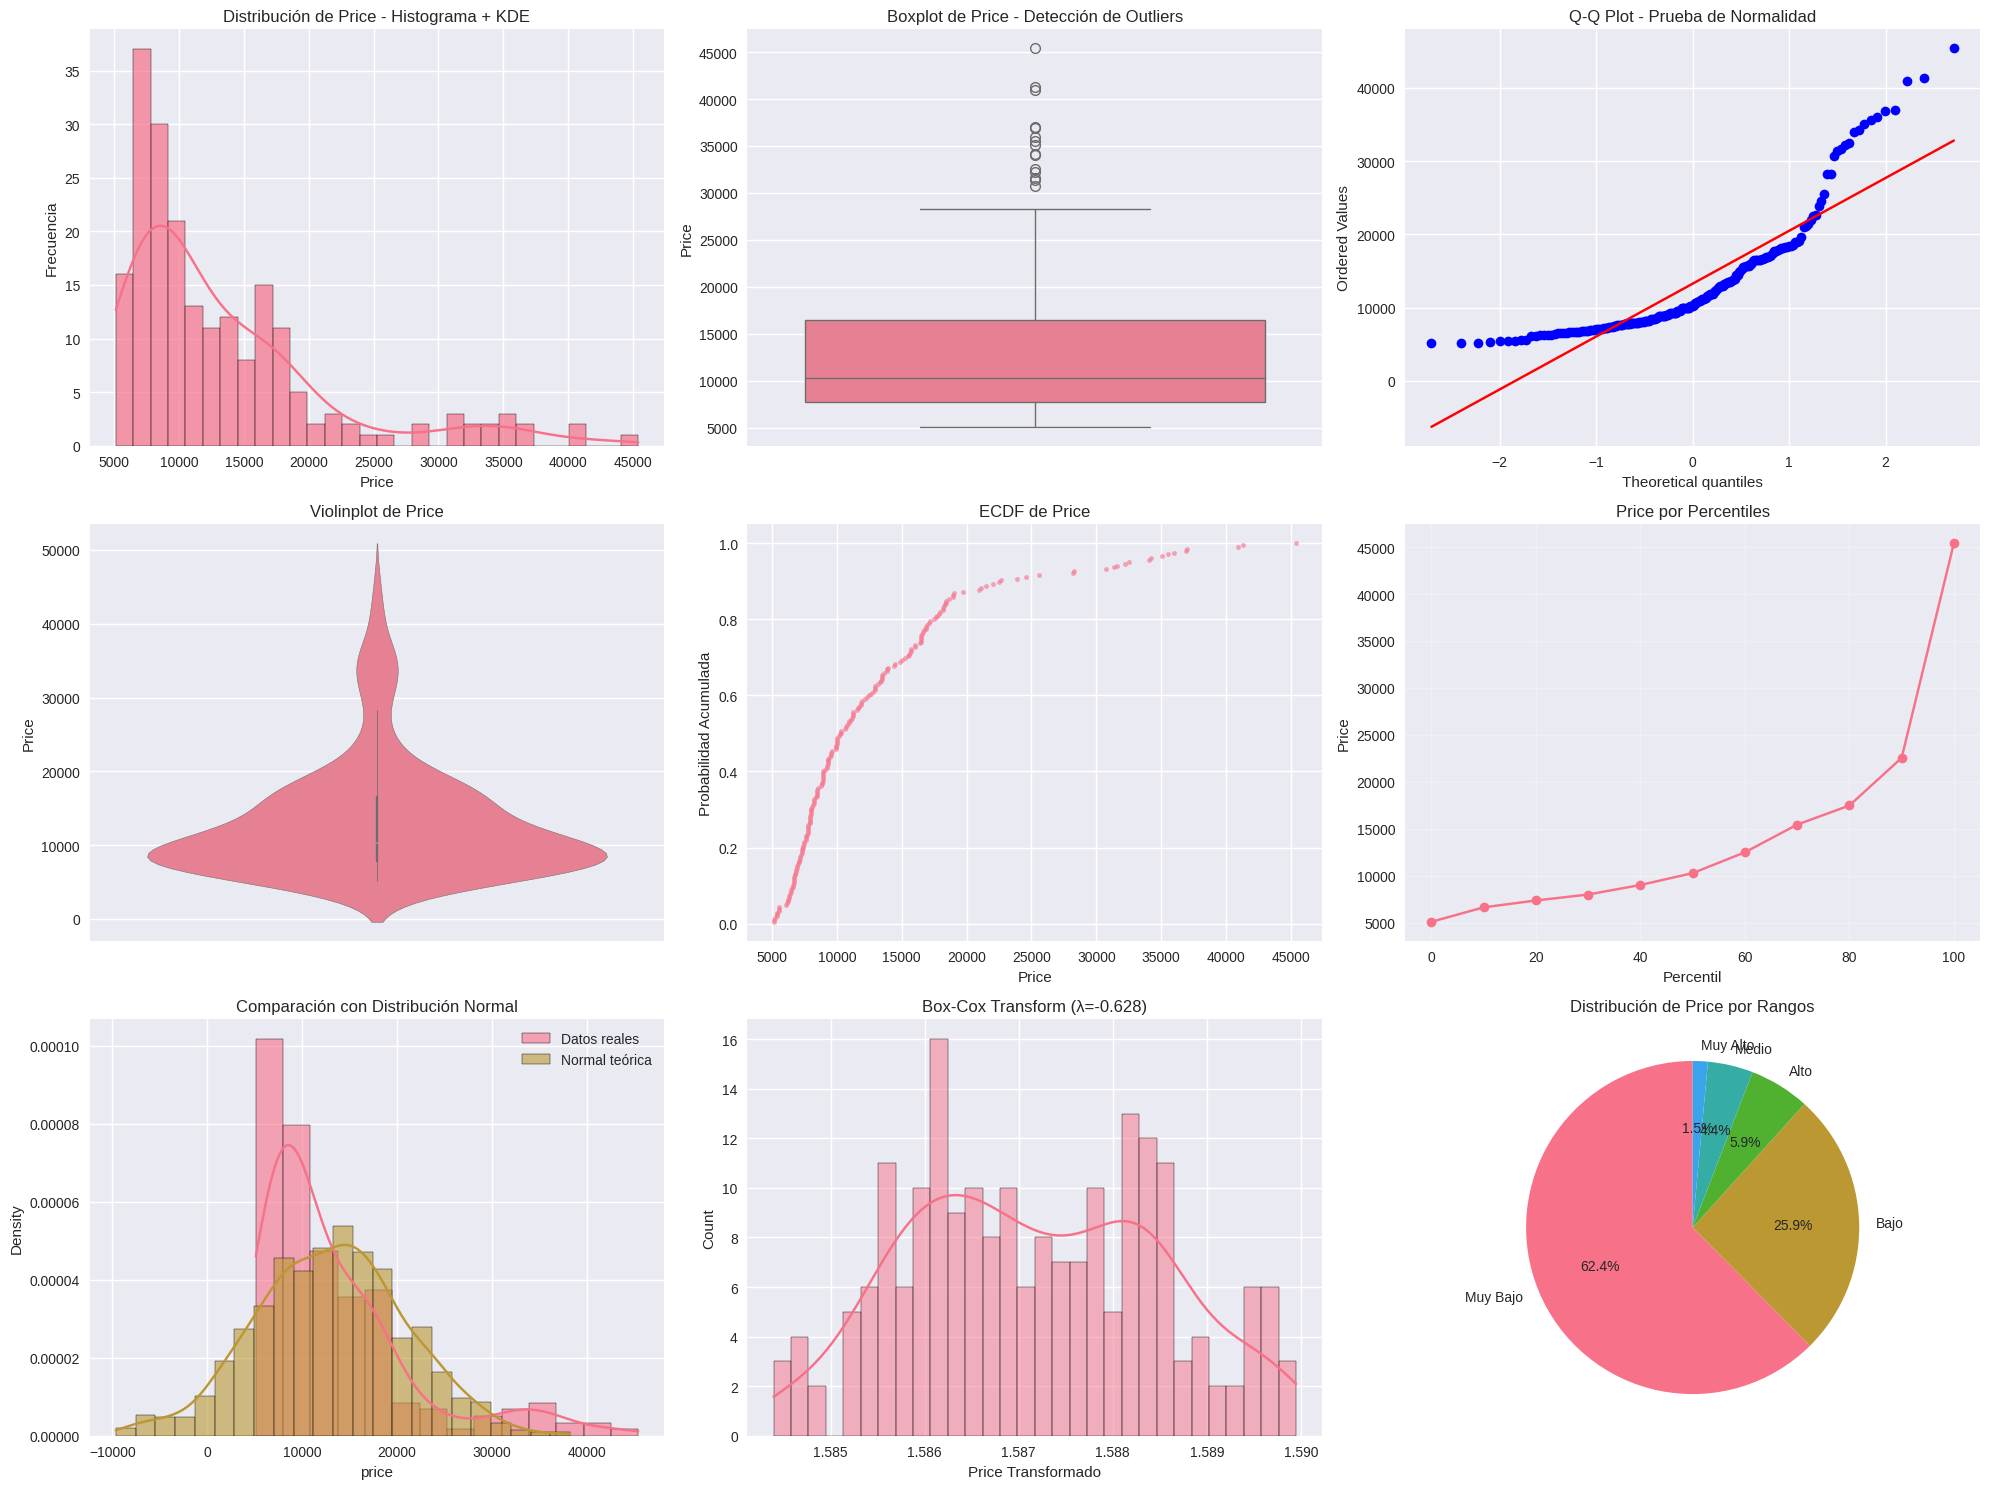


🧪 TESTS DE NORMALIDAD:
• Shapiro-Wilk: estadístico=0.8007, p-valor=0.000000
  ❌ No normal (α=0.05)
• Kolmogorov-Smirnov: estadístico=0.1558, p-valor=0.000082
  ❌ No normal (α=0.05)
• D'Agostino: estadístico=77.3751, p-valor=0.000000
  ❌ No normal (α=0.05)

🔍 ANÁLISIS DE OUTLIERS:
• Límite inferior: -5284.50
• Límite superior: 29575.50
• Número de outliers: 15 (7.3%)
• Rango de outliers: 30760.00 - 45400.00
• Outliers detectados: [30760.0, 31400.5, 31600.0, 32250.0, 32528.0, 34028.0, 34184.0, 35056.0, 35550.0, 36000.0, 36880.0, 37028.0, 40960.0, 41315.0, 45400.0]


In [13]:
# ============================================================================
# EDA 5 - ANÁLISIS COMPLETO DE LA VARIABLE OBJETIVO (PRICE)
# ============================================================================

print("🎯 ANÁLISIS COMPLETO DE LA VARIABLE OBJETIVO: PRICE")
print("=" * 60)

# Estadísticas descriptivas de price
price_stats = car_df['price'].describe()
print("📊 Estadísticas descriptivas de Price:")
print(price_stats)

# Estadísticas adicionales
print(f"\n📈 Estadísticas adicionales:")
print(f"• Varianza: {car_df['price'].var():.2f}")
print(f"• Desviación estándar: {car_df['price'].std():.2f}")
print(f"• Coeficiente de variación: {(car_df['price'].std()/car_df['price'].mean())*100:.2f}%")
print(f"• Asimetría: {car_df['price'].skew():.3f}")
print(f"• Curtosis: {car_df['price'].kurtosis():.3f}")

# Crear subplots para múltiples visualizaciones
fig = plt.figure(figsize=(20, 15))

# 1. Histograma con KDE
plt.subplot(3, 3, 1)
sns.histplot(car_df['price'], kde=True, bins=30, alpha=0.7)
plt.title('Distribución de Price - Histograma + KDE', fontsize=12)
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# 2. Boxplot para detectar outliers
plt.subplot(3, 3, 2)
sns.boxplot(y=car_df['price'])
plt.title('Boxplot de Price - Detección de Outliers', fontsize=12)
plt.ylabel('Price')

# 3. Q-Q Plot para normalidad
plt.subplot(3, 3, 3)
stats.probplot(car_df['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Prueba de Normalidad', fontsize=12)

# 4. Violinplot
plt.subplot(3, 3, 4)
sns.violinplot(y=car_df['price'])
plt.title('Violinplot de Price', fontsize=12)
plt.ylabel('Price')

# 5. ECDF (Empirical Cumulative Distribution Function)
plt.subplot(3, 3, 5)
sorted_data = np.sort(car_df['price'])
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y_vals, marker='.', linestyle='none', alpha=0.6)
plt.title('ECDF de Price', fontsize=12)
plt.xlabel('Price')
plt.ylabel('Probabilidad Acumulada')

# 6. Distribución por percentiles
plt.subplot(3, 3, 6)
percentiles = [car_df['price'].quantile(i/10) for i in range(11)]
plt.plot(range(0, 101, 10), percentiles, marker='o')
plt.title('Price por Percentiles', fontsize=12)
plt.xlabel('Percentil')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)

# 7. Density plot comparado con normal
plt.subplot(3, 3, 7)
sns.histplot(car_df['price'], kde=True, stat='density', alpha=0.6, label='Datos reales')
# Generar distribución normal con misma media y std
normal_dist = np.random.normal(car_df['price'].mean(), car_df['price'].std(), 1000)
sns.histplot(normal_dist, kde=True, stat='density', alpha=0.6, label='Normal teórica')
plt.title('Comparación con Distribución Normal', fontsize=12)
plt.legend()

# 8. Box-Cox transformation test
plt.subplot(3, 3, 8)
# Asegurar que todos los valores sean positivos para Box-Cox
price_positive = car_df['price'] + 1  # Agregar 1 para evitar ceros
try:
    transformed_data, lambda_param = stats.boxcox(price_positive)
    sns.histplot(transformed_data, kde=True, bins=30)
    plt.title(f'Box-Cox Transform (λ={lambda_param:.3f})', fontsize=12)
    plt.xlabel('Price Transformado')
except:
    plt.text(0.5, 0.5, 'Error en Box-Cox\nTransformation', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Box-Cox Transform (Error)', fontsize=12)

# 9. Rangos de price
plt.subplot(3, 3, 9)
# Crear bins para rangos de precios
bins = pd.cut(car_df['price'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
bin_counts = bins.value_counts()
plt.pie(bin_counts.values, labels=bin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Price por Rangos', fontsize=12)

plt.tight_layout()
plt.show()

# Tests de normalidad
print("\n🧪 TESTS DE NORMALIDAD:")
print("=" * 40)

# Shapiro-Wilk test (para muestras pequeñas)
if len(car_df['price']) <= 5000:  # Shapiro-Wilk es mejor para muestras pequeñas
    shapiro_stat, shapiro_p = stats.shapiro(car_df['price'])
    print(f"• Shapiro-Wilk: estadístico={shapiro_stat:.4f}, p-valor={shapiro_p:.6f}")
    print(f"  {'✅ Normal' if shapiro_p > 0.05 else '❌ No normal'} (α=0.05)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(car_df['price'], 'norm', args=(car_df['price'].mean(), car_df['price'].std()))
print(f"• Kolmogorov-Smirnov: estadístico={ks_stat:.4f}, p-valor={ks_p:.6f}")
print(f"  {'✅ Normal' if ks_p > 0.05 else '❌ No normal'} (α=0.05)")

# D'Agostino's test
dagostino_stat, dagostino_p = stats.normaltest(car_df['price'])
print(f"• D'Agostino: estadístico={dagostino_stat:.4f}, p-valor={dagostino_p:.6f}")
print(f"  {'✅ Normal' if dagostino_p > 0.05 else '❌ No normal'} (α=0.05)")

# Análisis de outliers
print("\n🔍 ANÁLISIS DE OUTLIERS:")
print("=" * 40)

Q1 = car_df['price'].quantile(0.25)
Q3 = car_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = car_df[(car_df['price'] < lower_bound) | (car_df['price'] > upper_bound)]['price']
print(f"• Límite inferior: {lower_bound:.2f}")
print(f"• Límite superior: {upper_bound:.2f}")
print(f"• Número de outliers: {len(outliers)} ({len(outliers)/len(car_df)*100:.1f}%)")
print(f"• Rango de outliers: {outliers.min():.2f} - {outliers.max():.2f}")

if len(outliers) > 0:
    print(f"• Outliers detectados: {sorted(outliers.tolist())}")

**EDA 6**

**Análisis univariado de otras variables importantes**

*Variables relevantes:* Se analizan otras variables que pueden influir en el precio, como enginesize y horsepower.

*Objetivo:* Observar su distribución, identificar posibles sesgos o valores extremos y entender su comportamiento antes de relacionarlas con price.

🔍 ANÁLISIS UNIVARIADO DE VARIABLES PRINCIPALES
Variables disponibles para análisis: ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg', 'wheelbase']

📊 ANÁLISIS DE ENGINESIZE
----------------------------------------
• Conteo: 205
• Media: 126.91
• Mediana: 120.00
• Desv. Estándar: 41.64
• Mínimo: 61.00
• Máximo: 326.00
• Rango: 265.00
• Asimetría: 1.948
• Curtosis: 5.306
• Valores únicos: 44 (21.5%)

📊 ANÁLISIS DE HORSEPOWER
----------------------------------------
• Conteo: 205
• Media: 104.12
• Mediana: 95.00
• Desv. Estándar: 39.54
• Mínimo: 48.00
• Máximo: 288.00
• Rango: 240.00
• Asimetría: 1.405
• Curtosis: 2.684
• Valores únicos: 59 (28.8%)

📊 ANÁLISIS DE CURBWEIGHT
----------------------------------------
• Conteo: 205
• Media: 2555.57
• Mediana: 2414.00
• Desv. Estándar: 520.68
• Mínimo: 1488.00
• Máximo: 4066.00
• Rango: 2578.00
• Asimetría: 0.681
• Curtosis: -0.043
• Valores únicos: 171 (83.4%)

📊 ANÁLISIS DE CITYMPG
----------------------------------------
•

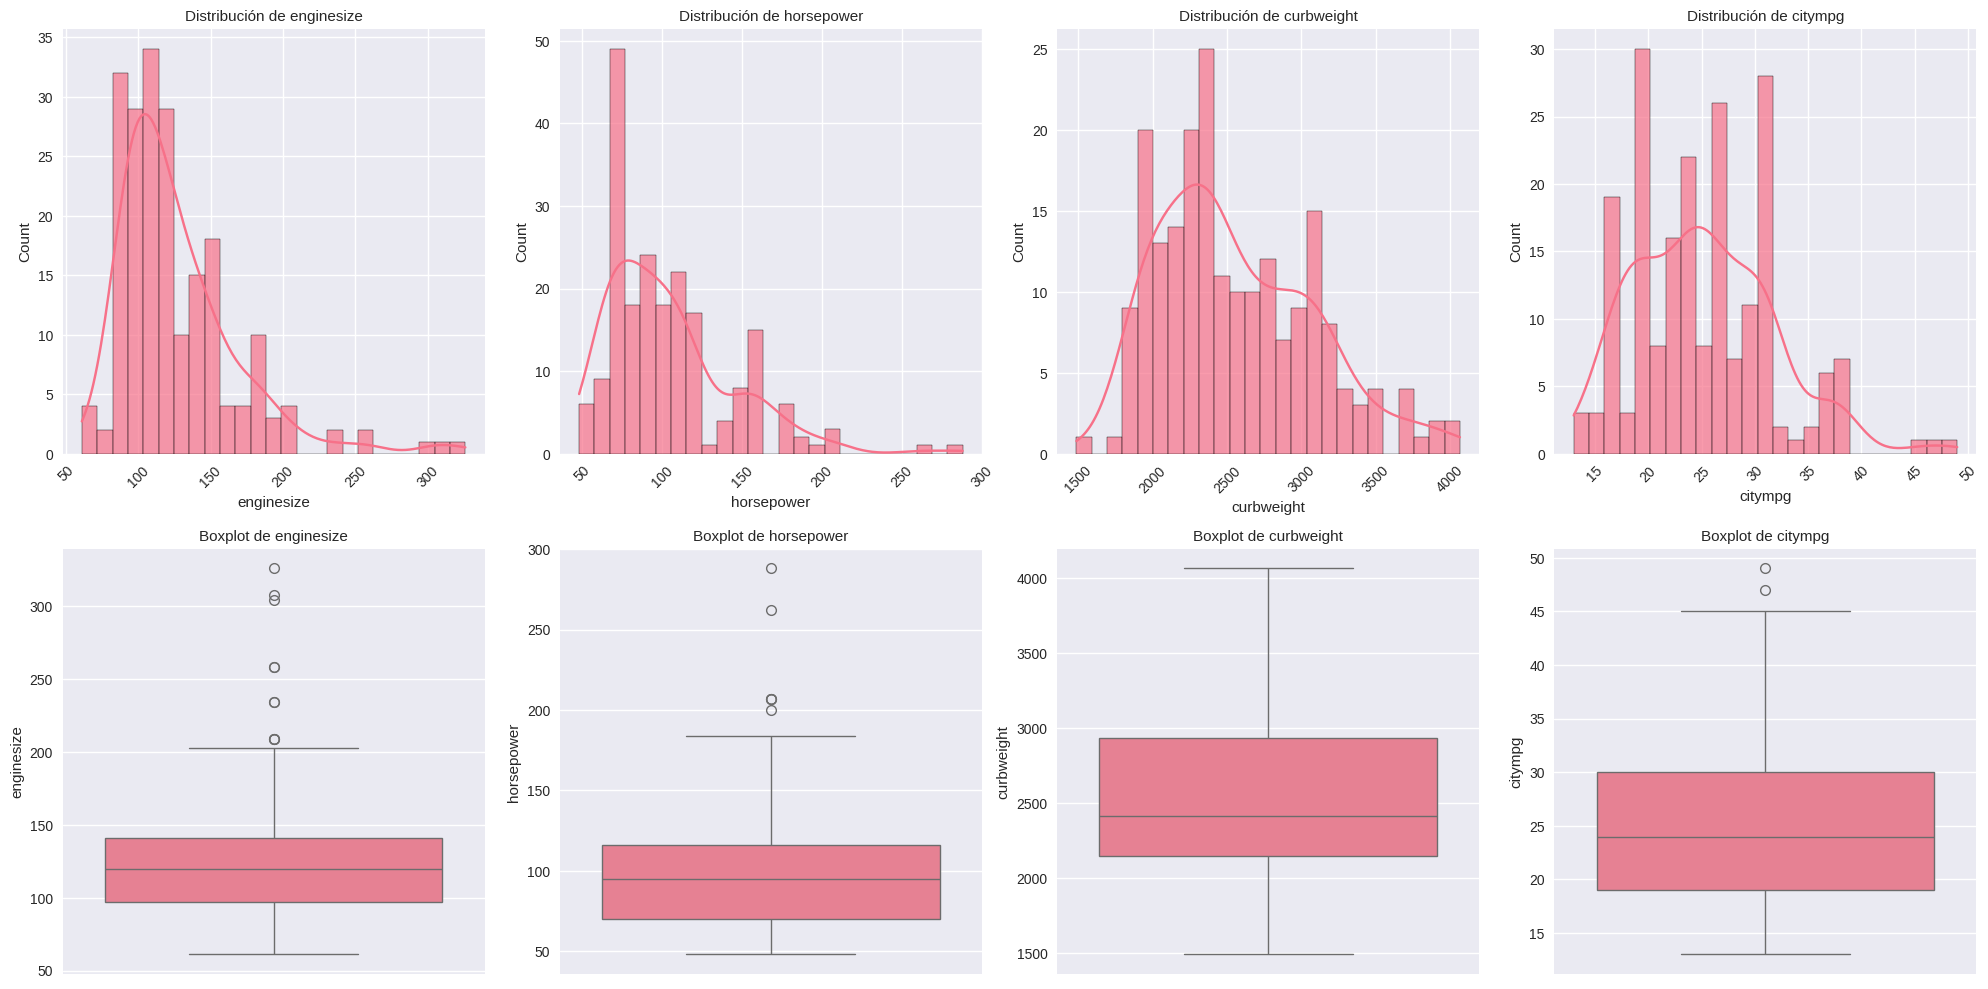


🔗 CORRELACIONES ENTRE VARIABLES PRINCIPALES


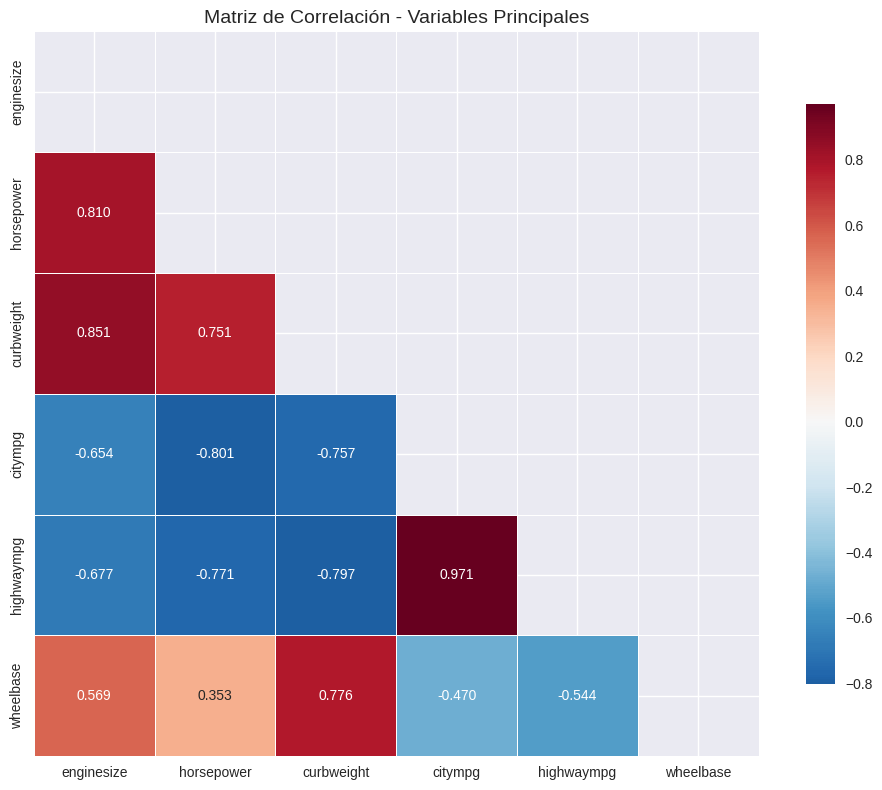


🔥 CORRELACIONES MÁS FUERTES (|r| > 0.5):
• enginesize ↔ horsepower: 0.810
• enginesize ↔ curbweight: 0.851
• enginesize ↔ citympg: -0.654
• enginesize ↔ highwaympg: -0.677
• enginesize ↔ wheelbase: 0.569
• horsepower ↔ curbweight: 0.751
• horsepower ↔ citympg: -0.801
• horsepower ↔ highwaympg: -0.771
• curbweight ↔ citympg: -0.757
• curbweight ↔ highwaympg: -0.797
• curbweight ↔ wheelbase: 0.776
• citympg ↔ highwaympg: 0.971
• highwaympg ↔ wheelbase: -0.544

📊 ANÁLISIS POR PERCENTILES


,enginesize,horsepower,curbweight,citympg,highwaympg,wheelbase
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,104.117073,2555.565854,25.219512,30.751220,98.756585
std,41.642693,39.544167,520.680204,6.542142,6.886443,6.021776
min,61.000000,48.000000,1488.000000,13.000000,16.000000,86.600000
5%,90.000000,62.000000,1901.000000,16.000000,22.000000,93.020000
10%,91.000000,68.000000,1947.000000,17.000000,23.000000,93.700000
25%,97.000000,70.000000,2145.000000,19.000000,25.000000,94.500000
50%,120.000000,95.000000,2414.000000,24.000000,30.000000,97.000000
75%,141.000000,116.000000,2935.000000,30.000000,34.000000,102.400000
90%,181.000000,160.000000,3230.000000,31.600000,38.000000,107.900000


In [14]:
# ============================================================================
# EDA 6 - ANÁLISIS UNIVARIADO COMPLETO DE VARIABLES CLAVE
# ============================================================================

print("🔍 ANÁLISIS UNIVARIADO DE VARIABLES PRINCIPALES")
print("=" * 60)

# Seleccionar variables numéricas importantes
key_variables = ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg', 'wheelbase']

# Verificar que las variables existen en el dataset
available_vars = [var for var in key_variables if var in car_df.columns]
print(f"Variables disponibles para análisis: {available_vars}")

# Función para análisis detallado de cada variable
def analyze_variable(df, var_name):
    """Análisis completo de una variable numérica"""
    if var_name not in df.columns:
        print(f"Variable {var_name} no encontrada")
        return
    
    data = df[var_name].dropna()
    
    print(f"\n📊 ANÁLISIS DE {var_name.upper()}")
    print("-" * 40)
    
    # Estadísticas básicas
    print(f"• Conteo: {len(data)}")
    print(f"• Media: {data.mean():.2f}")
    print(f"• Mediana: {data.median():.2f}")
    print(f"• Desv. Estándar: {data.std():.2f}")
    print(f"• Mínimo: {data.min():.2f}")
    print(f"• Máximo: {data.max():.2f}")
    print(f"• Rango: {data.max() - data.min():.2f}")
    print(f"• Asimetría: {data.skew():.3f}")
    print(f"• Curtosis: {data.kurtosis():.3f}")
    
    # Valores únicos
    unique_vals = data.nunique()
    print(f"• Valores únicos: {unique_vals} ({unique_vals/len(data)*100:.1f}%)")

# Análisis individual de cada variable
for var in available_vars[:4]:  # Analizar las primeras 4 variables
    if var in car_df.columns:
        analyze_variable(car_df, var)

# Crear visualizaciones para las variables principales
n_vars = min(4, len(available_vars))
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(available_vars[:4]):
    if var in car_df.columns:
        # Histograma con KDE
        sns.histplot(car_df[var].dropna(), kde=True, bins=25, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribución de {var}', fontsize=11)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Boxplot
        sns.boxplot(y=car_df[var].dropna(), ax=axes[i+4])
        axes[i+4].set_title(f'Boxplot de {var}', fontsize=11)

# Ocultar ejes no utilizados
for j in range(i+1, len(axes)//2):
    axes[j].set_visible(False)
    axes[j+4].set_visible(False)

plt.tight_layout()
plt.show()

# Matriz de correlación entre variables principales
print("\n🔗 CORRELACIONES ENTRE VARIABLES PRINCIPALES")
print("=" * 60)

correlation_vars = [var for var in available_vars if var in car_df.columns]
if len(correlation_vars) > 1:
    corr_matrix = car_df[correlation_vars].corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo la mitad
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
    plt.title('Matriz de Correlación - Variables Principales', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Mostrar correlaciones más fuertes
    print("\n🔥 CORRELACIONES MÁS FUERTES (|r| > 0.5):")
    for i in range(len(correlation_vars)):
        for j in range(i+1, len(correlation_vars)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                print(f"• {correlation_vars[i]} ↔ {correlation_vars[j]}: {corr_val:.3f}")

# Análisis de distribuciones por percentiles
print("\n📊 ANÁLISIS POR PERCENTILES")
print("=" * 50)

percentiles_df = car_df[correlation_vars].describe(percentiles=[.05, .10, .25, .50, .75, .90, .95])
display(percentiles_df)

**EDA 7**

**Detección de outliers con boxplots**

**Boxplot:** Permite visualizar los valores atípicos (outliers) en la variable price.

**Decisión:** Si se detectan outliers, se debe evaluar si son errores o si representan variaciones legítimas en los datos. Esto es crucial para evitar que afecten el rendimiento de los modelos.

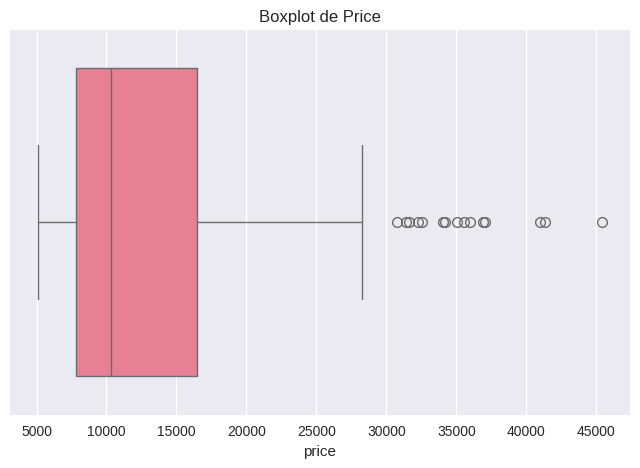

In [15]:
## EDA 7 ##
plt.figure(figsize=(8, 5))
sns.boxplot(x=car_df['price'])
plt.title('Boxplot de Price')
plt.show()

**EDA 8**

**Análisis de correlación**

**Matriz de correlación:** Se calcula la correlación entre las variables numéricas del dataset.

**Heatmap:** El mapa de calor ayuda a visualizar fácilmente qué variables están fuertemente correlacionadas.

**Propósito:** Identificar relaciones potencialmente lineales entre price y otras variables, lo que es esencial para la selección de variables en modelos de regresión.

🔗 ANÁLISIS DE CORRELACIÓN COMPLETO
Variables numéricas encontradas: 16
Variables: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


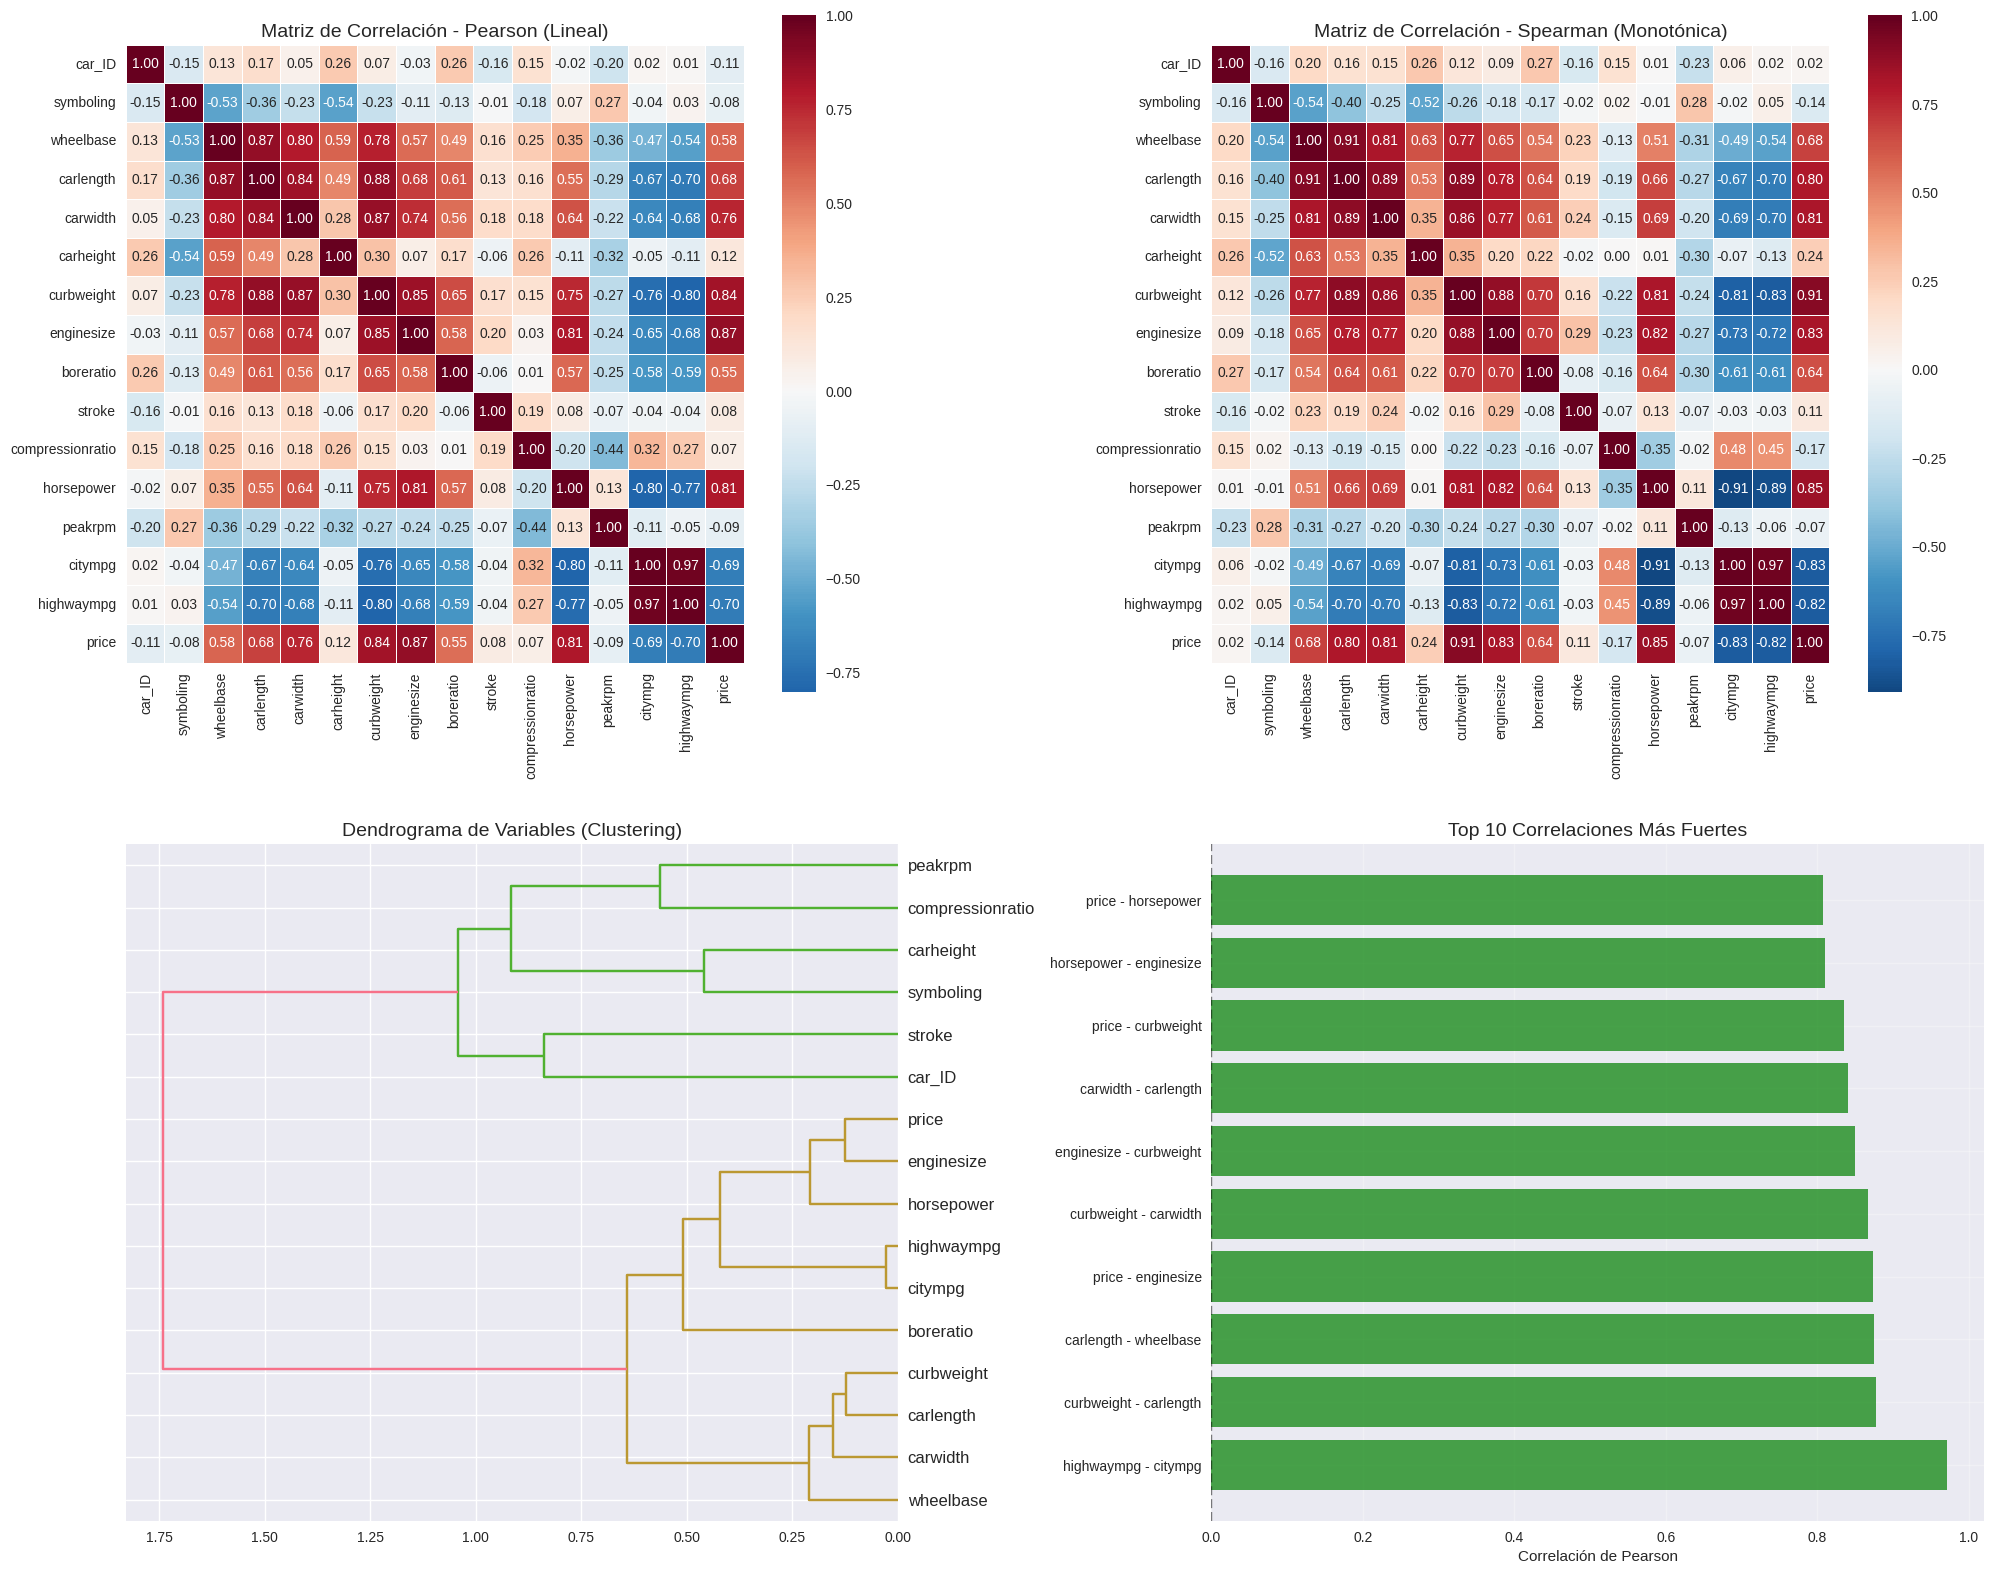


📊 ANÁLISIS DETALLADO DE CORRELACIONES

🔍 PEARSON:
------------------------------
• Correlación promedio: 0.082
• Desviación estándar: 0.460
• Correlación mínima: -0.801
• Correlación máxima: 0.971
• Correlaciones fuertes positivas (>0.7): 15
• Correlaciones moderadas positivas (0.3-0.7): 17
• Correlaciones débiles positivas (0.1-0.3): 23
• Correlaciones débiles negativas (-0.3 a -0.1): 18
• Correlaciones moderadas negativas (-0.7 a -0.3): 17
• Correlaciones fuertes negativas (<-0.7): 5

🔍 SPEARMAN:
------------------------------
• Correlación promedio: 0.083
• Desviación estándar: 0.494
• Correlación mínima: -0.911
• Correlación máxima: 0.968
• Correlaciones fuertes positivas (>0.7): 19
• Correlaciones moderadas positivas (0.3-0.7): 16
• Correlaciones débiles positivas (0.1-0.3): 19
• Correlaciones débiles negativas (-0.3 a -0.1): 23
• Correlaciones moderadas negativas (-0.7 a -0.3): 12
• Correlaciones fuertes negativas (<-0.7): 9

🔍 KENDALL:
------------------------------
• Correlaci

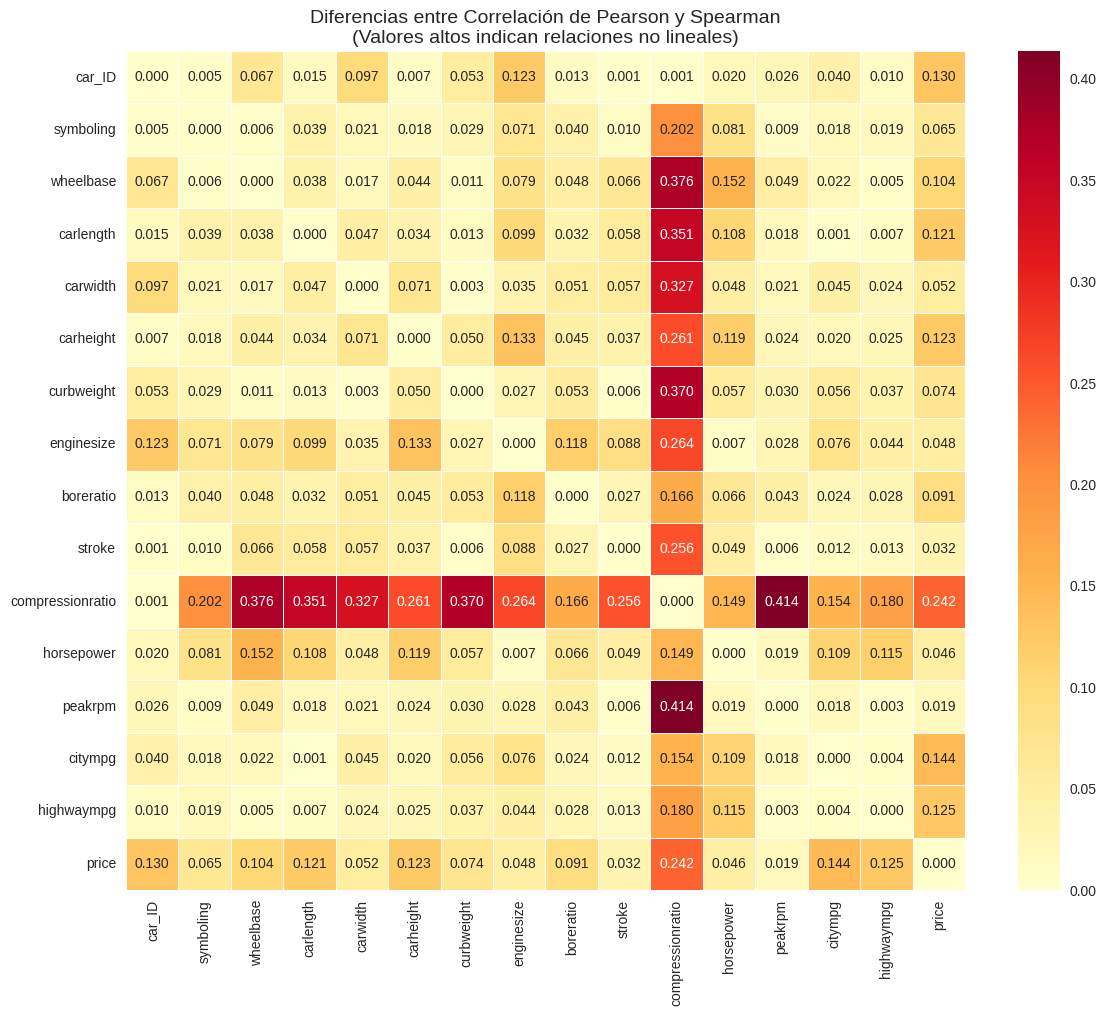

In [16]:
# ============================================================================
# EDA 8 - ANÁLISIS DE CORRELACIÓN AVANZADO
# ============================================================================

print("🔗 ANÁLISIS DE CORRELACIÓN COMPLETO")
print("=" * 60)

# Seleccionar solo variables numéricas
numeric_columns = car_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas encontradas: {len(numeric_columns)}")
print(f"Variables: {numeric_columns}")

# Calcular diferentes tipos de correlación
correlation_data = car_df[numeric_columns]

# 1. Correlación de Pearson (lineal)
pearson_corr = correlation_data.corr(method='pearson')

# 2. Correlación de Spearman (monotónica)
spearman_corr = correlation_data.corr(method='spearman')

# 3. Correlación de Kendall (ordinal)
kendall_corr = correlation_data.corr(method='kendall')

# Crear visualizaciones múltiples
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Heatmap de correlación de Pearson
sns.heatmap(pearson_corr, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, ax=axes[0,0], fmt='.2f')
axes[0,0].set_title('Matriz de Correlación - Pearson (Lineal)', fontsize=14)

# Heatmap de correlación de Spearman
sns.heatmap(spearman_corr, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, ax=axes[0,1], fmt='.2f')
axes[0,1].set_title('Matriz de Correlación - Spearman (Monotónica)', fontsize=14)

# Clustermap para agrupar variables similares
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

# Convertir correlaciones a distancias
distance_matrix = 1 - abs(pearson_corr)
condensed_distances = squareform(distance_matrix)
linkage_matrix = sch.linkage(condensed_distances, method='ward')

# Crear dendrograma
axes[1,0].clear()
dendrogram = sch.dendrogram(linkage_matrix, labels=pearson_corr.columns, 
                           orientation='left', ax=axes[1,0])
axes[1,0].set_title('Dendrograma de Variables (Clustering)', fontsize=14)

# Gráfico de barras de correlaciones más fuertes
axes[1,1].clear()
# Obtener pares de correlaciones excluyendo la diagonal
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
corr_pairs = pearson_corr.mask(mask).stack().sort_values(key=abs, ascending=False)
top_correlations = corr_pairs.head(10)

colors = ['red' if x < -0.5 else 'green' if x > 0.5 else 'blue' for x in top_correlations]
bars = axes[1,1].barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
axes[1,1].set_yticks(range(len(top_correlations)))
axes[1,1].set_yticklabels([f"{pair[0]} - {pair[1]}" for pair in top_correlations.index], fontsize=10)
axes[1,1].set_xlabel('Correlación de Pearson')
axes[1,1].set_title('Top 10 Correlaciones Más Fuertes', fontsize=14)
axes[1,1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones
print("\n📊 ANÁLISIS DETALLADO DE CORRELACIONES")
print("=" * 60)

def analyze_correlations(corr_matrix, method_name):
    print(f"\n🔍 {method_name.upper()}:")
    print("-" * 30)
    
    # Estadísticas de la matriz de correlación
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlations = upper_triangle.stack()
    
    print(f"• Correlación promedio: {correlations.mean():.3f}")
    print(f"• Desviación estándar: {correlations.std():.3f}")
    print(f"• Correlación mínima: {correlations.min():.3f}")
    print(f"• Correlación máxima: {correlations.max():.3f}")
    
    # Contar correlaciones por rangos
    strong_positive = (correlations > 0.7).sum()
    moderate_positive = ((correlations > 0.3) & (correlations <= 0.7)).sum()
    weak_positive = ((correlations > 0.1) & (correlations <= 0.3)).sum()
    weak_negative = ((correlations < -0.1) & (correlations >= -0.3)).sum()
    moderate_negative = ((correlations < -0.3) & (correlations >= -0.7)).sum()
    strong_negative = (correlations < -0.7).sum()
    
    print(f"• Correlaciones fuertes positivas (>0.7): {strong_positive}")
    print(f"• Correlaciones moderadas positivas (0.3-0.7): {moderate_positive}")
    print(f"• Correlaciones débiles positivas (0.1-0.3): {weak_positive}")
    print(f"• Correlaciones débiles negativas (-0.3 a -0.1): {weak_negative}")
    print(f"• Correlaciones moderadas negativas (-0.7 a -0.3): {moderate_negative}")
    print(f"• Correlaciones fuertes negativas (<-0.7): {strong_negative}")

# Analizar cada tipo de correlación
analyze_correlations(pearson_corr, "Pearson")
analyze_correlations(spearman_corr, "Spearman")
analyze_correlations(kendall_corr, "Kendall")

# Comparación entre métodos de correlación
print("\n🔬 COMPARACIÓN ENTRE MÉTODOS")
print("=" * 50)

# Encontrar las mayores diferencias entre Pearson y Spearman
diff_matrix = abs(pearson_corr - spearman_corr)
upper_triangle = diff_matrix.where(np.triu(np.ones(diff_matrix.shape), k=1).astype(bool))
largest_diffs = upper_triangle.stack().sort_values(ascending=False).head(5)

print("🔍 Mayores diferencias entre Pearson y Spearman:")
print("(Indica relaciones no lineales)")
for (var1, var2), diff in largest_diffs.items():
    pearson_val = pearson_corr.loc[var1, var2]
    spearman_val = spearman_corr.loc[var1, var2]
    print(f"• {var1} - {var2}:")
    print(f"  Pearson: {pearson_val:.3f}, Spearman: {spearman_val:.3f}, Diferencia: {diff:.3f}")

# Crear un mapa de calor de las diferencias
plt.figure(figsize=(12, 10))
sns.heatmap(diff_matrix, annot=True, cmap='YlOrRd', 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Diferencias entre Correlación de Pearson y Spearman\n(Valores altos indican relaciones no lineales)', 
          fontsize=14)
plt.tight_layout()
plt.show()

**EDA 9**

**Correlación específica con la variable objetivo (price)**

**Selección de correlaciones:** Se extraen las correlaciones de todas las variables con price y se ordenan de mayor a menor.

**Interpretación:** La variable con la correlación más alta (en valor absoluto) es un buen candidato para la regresión lineal, ya que indica una relación fuerte con el precio. Por ejemplo, es común encontrar que enginesize tenga una correlación alta con price.


🎯 ANÁLISIS DE CORRELACIÓN CON PRICE
📊 CORRELACIONES CON PRICE (ORDENADAS POR PEARSON):


,Pearson,Spearman,Kendall
boreratio,0.5532,0.6438,0.4870
car_ID,-0.1091,0.0205,0.0491
carheight,0.1193,0.2428,0.1690
carlength,0.6829,0.8043,0.6263
carwidth,0.7593,0.8114,0.6360
citympg,-0.6858,-0.8295,-0.6574
compressionratio,0.0680,-0.1736,-0.1335
curbweight,0.8353,0.9091,0.7376
enginesize,0.8741,0.8260,0.6564
highwaympg,-0.6976,-0.8227,-0.6439


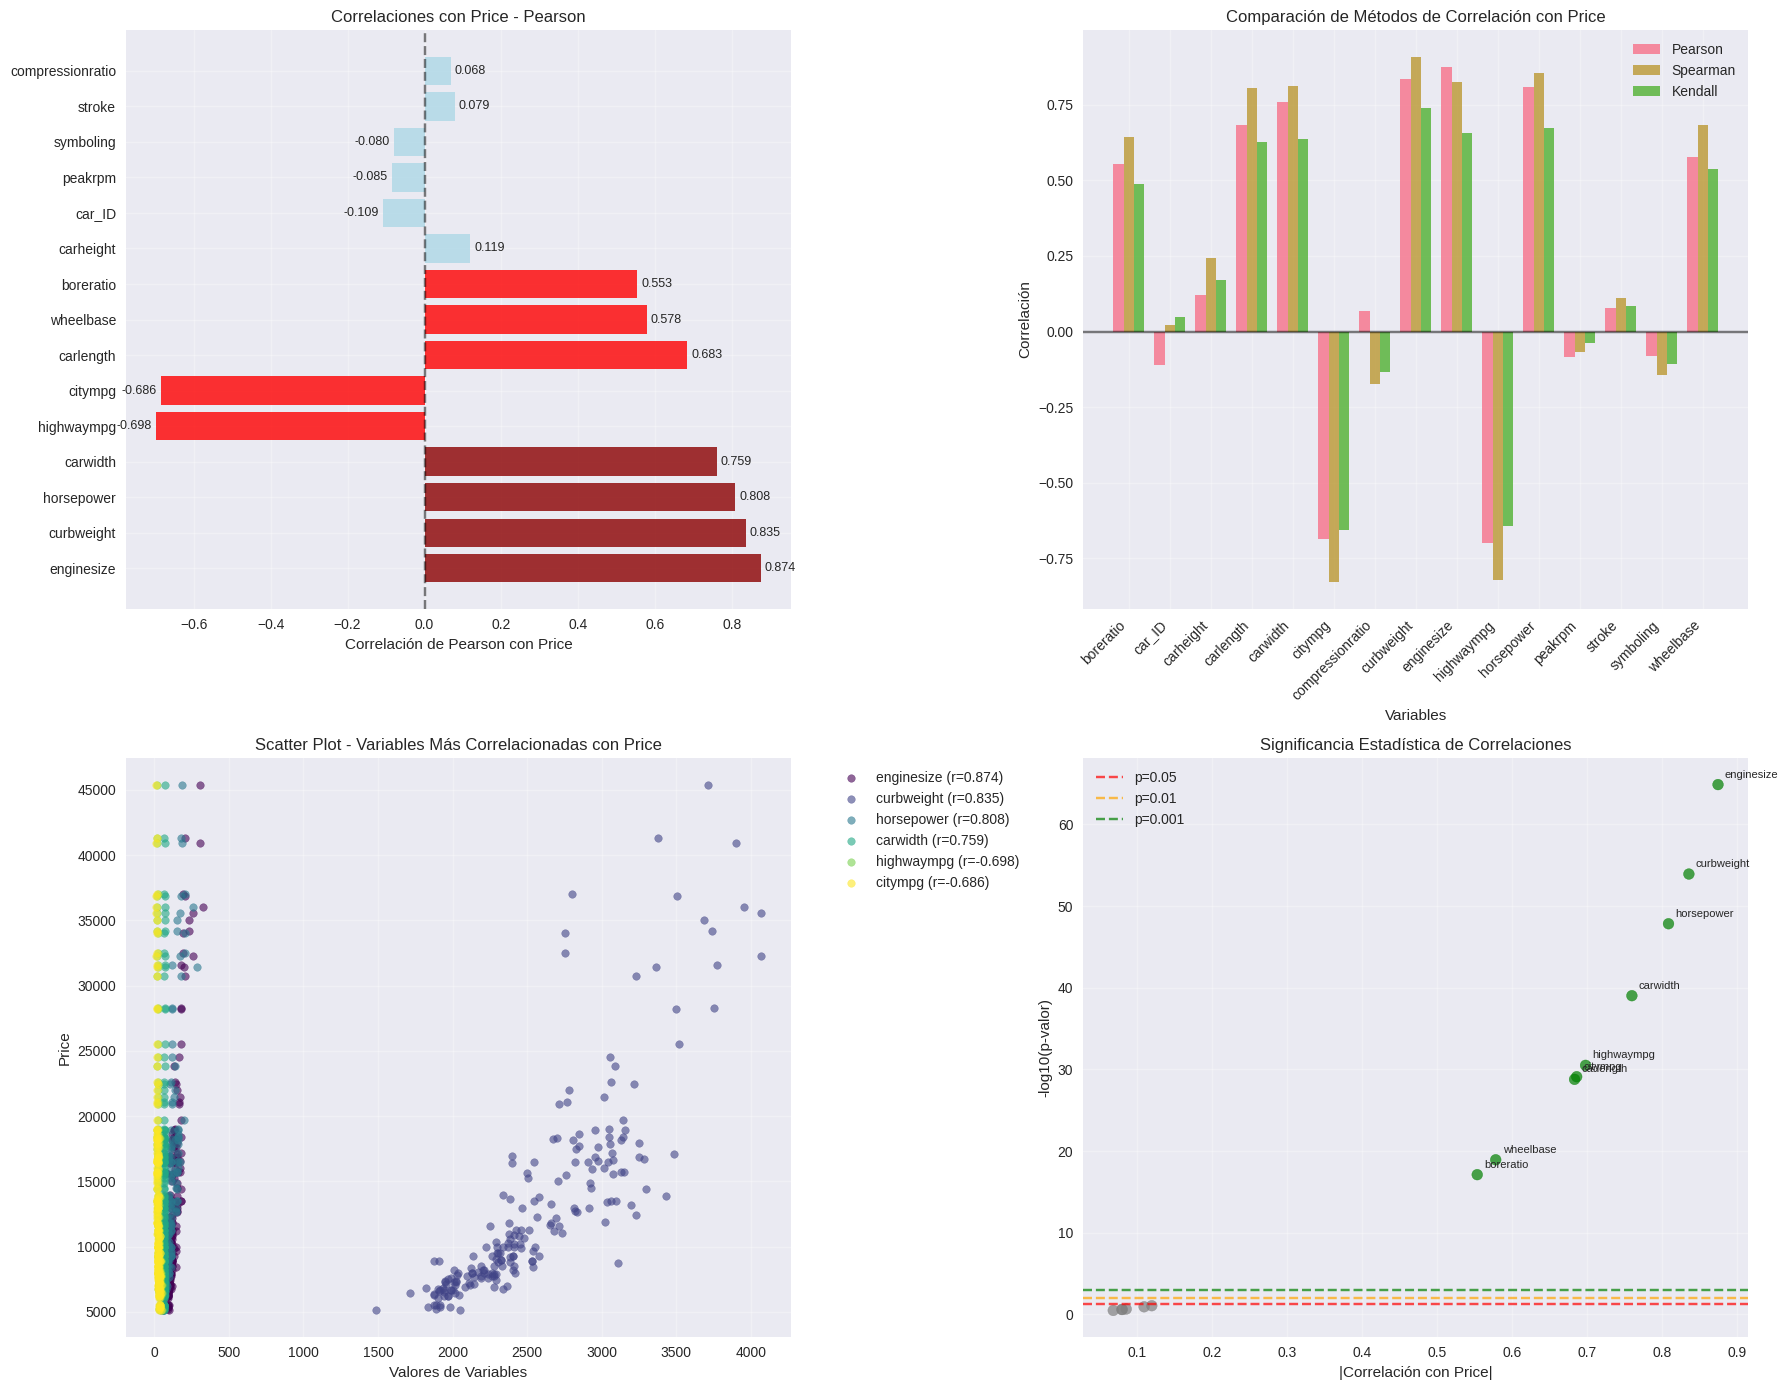


🔍 ANÁLISIS DETALLADO:
📈 Variables con CORRELACIÓN FUERTE (|r| > 0.7):
  • enginesize: 0.874 (correlación positiva fuerte)
  • curbweight: 0.835 (correlación positiva fuerte)
  • horsepower: 0.808 (correlación positiva fuerte)
  • carwidth: 0.759 (correlación positiva fuerte)

📊 Variables con CORRELACIÓN MODERADA (0.3 < |r| ≤ 0.7):
  • highwaympg: -0.698 (correlación negativa moderada)
  • citympg: -0.686 (correlación negativa moderada)
  • carlength: 0.683 (correlación positiva moderada)
  • wheelbase: 0.578 (correlación positiva moderada)
  • boreratio: 0.553 (correlación positiva moderada)

📉 Variables con CORRELACIÓN DÉBIL (|r| ≤ 0.3):
  • 6 variables con correlación débil
    - carheight: 0.119
    - car_ID: -0.109
    - peakrpm: -0.085
    - ... y 3 variables más

🧪 SIGNIFICANCIA ESTADÍSTICA:
• Muy significativas (p < 0.001): 9
• Significativas (0.001 ≤ p < 0.01): 0
• Marginalmente significativas (0.01 ≤ p < 0.05): 0
• No significativas (p ≥ 0.05): 6

💡 RECOMENDACIONES PARA MODEL

In [17]:
# ============================================================================
# EDA 9 - ANÁLISIS DE CORRELACIÓN CON VARIABLE OBJETIVO (PRICE)
# ============================================================================

print("🎯 ANÁLISIS DE CORRELACIÓN CON PRICE")
print("=" * 60)

# Verificar que 'price' esté en el dataset
if 'price' not in car_df.columns:
    print("❌ Error: La variable 'price' no se encuentra en el dataset")
    print(f"Columnas disponibles: {list(car_df.columns)}")
else:
    # Calcular correlaciones con price
    numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Diferentes tipos de correlación con price
    pearson_with_price = car_df[numeric_cols].corr()['price'].drop('price').sort_values(key=abs, ascending=False)
    spearman_with_price = car_df[numeric_cols].corr(method='spearman')['price'].drop('price').sort_values(key=abs, ascending=False)
    kendall_with_price = car_df[numeric_cols].corr(method='kendall')['price'].drop('price').sort_values(key=abs, ascending=False)
    
    # Crear DataFrame comparativo
    correlation_comparison = pd.DataFrame({
        'Pearson': pearson_with_price,
        'Spearman': spearman_with_price,
        'Kendall': kendall_with_price
    })
    
    print("📊 CORRELACIONES CON PRICE (ORDENADAS POR PEARSON):")
    print("=" * 60)
    display(correlation_comparison.round(4))
    
    # Visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # 1. Gráfico de barras de correlaciones Pearson
    colors = ['darkred' if abs(x) > 0.7 else 'red' if abs(x) > 0.5 else 'orange' if abs(x) > 0.3 else 'lightblue' for x in pearson_with_price]
    bars1 = axes[0,0].barh(range(len(pearson_with_price)), pearson_with_price.values, color=colors, alpha=0.8)
    axes[0,0].set_yticks(range(len(pearson_with_price)))
    axes[0,0].set_yticklabels(pearson_with_price.index, fontsize=10)
    axes[0,0].set_xlabel('Correlación de Pearson con Price')
    axes[0,0].set_title('Correlaciones con Price - Pearson', fontsize=12)
    axes[0,0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[0,0].grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for i, (bar, value) in enumerate(zip(bars1, pearson_with_price.values)):
        axes[0,0].text(value + 0.01 if value >= 0 else value - 0.01, i, f'{value:.3f}', 
                      va='center', ha='left' if value >= 0 else 'right', fontsize=9)
    
    # 2. Comparación de métodos de correlación
    x_pos = np.arange(len(correlation_comparison))
    width = 0.25
    
    axes[0,1].bar(x_pos - width, correlation_comparison['Pearson'], width, label='Pearson', alpha=0.8)
    axes[0,1].bar(x_pos, correlation_comparison['Spearman'], width, label='Spearman', alpha=0.8)
    axes[0,1].bar(x_pos + width, correlation_comparison['Kendall'], width, label='Kendall', alpha=0.8)
    
    axes[0,1].set_xlabel('Variables')
    axes[0,1].set_ylabel('Correlación')
    axes[0,1].set_title('Comparación de Métodos de Correlación con Price')
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(correlation_comparison.index, rotation=45, ha='right')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Scatter plot de las correlaciones más fuertes
    top_correlated = pearson_with_price.head(6)  # Top 6 variables más correlacionadas
    
    colors_scatter = plt.cm.viridis(np.linspace(0, 1, len(top_correlated)))
    
    for i, (var, corr_val) in enumerate(top_correlated.items()):
        if var in car_df.columns:
            axes[1,0].scatter(car_df[var], car_df['price'], alpha=0.6, 
                            color=colors_scatter[i], label=f'{var} (r={corr_val:.3f})', s=30)
    
    axes[1,0].set_xlabel('Valores de Variables')
    axes[1,0].set_ylabel('Price')
    axes[1,0].set_title('Scatter Plot - Variables Más Correlacionadas con Price')
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Análisis de significancia estadística
    axes[1,1].clear()
    
    # Calcular p-valores para las correlaciones
    from scipy.stats import pearsonr
    
    significant_vars = []
    p_values = []
    correlations_vals = []
    
    for var in pearson_with_price.index:
        if var in car_df.columns:
            corr_val, p_val = pearsonr(car_df[var].dropna(), 
                                     car_df['price'][car_df[var].notna()])
            significant_vars.append(var)
            p_values.append(p_val)
            correlations_vals.append(abs(corr_val))
    
    # Gráfico de significancia (p-valor vs correlación)
    colors_sig = ['green' if p < 0.001 else 'orange' if p < 0.01 else 'red' if p < 0.05 else 'gray' for p in p_values]
    scatter = axes[1,1].scatter(correlations_vals, [-np.log10(p) for p in p_values], 
                               c=colors_sig, alpha=0.7, s=60)
    
    axes[1,1].axhline(y=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='p=0.05')
    axes[1,1].axhline(y=-np.log10(0.01), color='orange', linestyle='--', alpha=0.7, label='p=0.01')
    axes[1,1].axhline(y=-np.log10(0.001), color='green', linestyle='--', alpha=0.7, label='p=0.001')
    
    axes[1,1].set_xlabel('|Correlación con Price|')
    axes[1,1].set_ylabel('-log10(p-valor)')
    axes[1,1].set_title('Significancia Estadística de Correlaciones')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # Añadir etiquetas para variables significativas
    for i, (var, corr_val, p_val) in enumerate(zip(significant_vars, correlations_vals, p_values)):
        if p_val < 0.001 and corr_val > 0.3:  # Solo etiquetar las más significativas
            axes[1,1].annotate(var, (corr_val, -np.log10(p_val)), 
                              xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis textual detallado
    print("\n🔍 ANÁLISIS DETALLADO:")
    print("=" * 50)
    
    print("📈 Variables con CORRELACIÓN FUERTE (|r| > 0.7):")
    strong_corr = pearson_with_price[abs(pearson_with_price) > 0.7]
    if len(strong_corr) > 0:
        for var, corr_val in strong_corr.items():
            direction = "positiva" if corr_val > 0 else "negativa"
            print(f"  • {var}: {corr_val:.3f} (correlación {direction} fuerte)")
    else:
        print("  • No se encontraron correlaciones fuertes")
    
    print("\n📊 Variables con CORRELACIÓN MODERADA (0.3 < |r| ≤ 0.7):")
    moderate_corr = pearson_with_price[(abs(pearson_with_price) > 0.3) & (abs(pearson_with_price) <= 0.7)]
    if len(moderate_corr) > 0:
        for var, corr_val in moderate_corr.items():
            direction = "positiva" if corr_val > 0 else "negativa"
            print(f"  • {var}: {corr_val:.3f} (correlación {direction} moderada)")
    else:
        print("  • No se encontraron correlaciones moderadas")
    
    print("\n📉 Variables con CORRELACIÓN DÉBIL (|r| ≤ 0.3):")
    weak_corr = pearson_with_price[abs(pearson_with_price) <= 0.3]
    if len(weak_corr) > 0:
        print(f"  • {len(weak_corr)} variables con correlación débil")
        for var, corr_val in weak_corr.head(3).items():  # Mostrar solo las primeras 3
            print(f"    - {var}: {corr_val:.3f}")
        if len(weak_corr) > 3:
            print(f"    - ... y {len(weak_corr)-3} variables más")
    
    # Estadísticas de significancia
    print(f"\n🧪 SIGNIFICANCIA ESTADÍSTICA:")
    print("=" * 40)
    very_significant = sum(1 for p in p_values if p < 0.001)
    significant = sum(1 for p in p_values if 0.001 <= p < 0.01)
    marginally_significant = sum(1 for p in p_values if 0.01 <= p < 0.05)
    not_significant = sum(1 for p in p_values if p >= 0.05)
    
    print(f"• Muy significativas (p < 0.001): {very_significant}")
    print(f"• Significativas (0.001 ≤ p < 0.01): {significant}")
    print(f"• Marginalmente significativas (0.01 ≤ p < 0.05): {marginally_significant}")
    print(f"• No significativas (p ≥ 0.05): {not_significant}")
    
    # Recomendaciones para modelado
    print(f"\n💡 RECOMENDACIONES PARA MODELADO:")
    print("=" * 50)
    
    best_predictors = pearson_with_price[abs(pearson_with_price) > 0.5]
    if len(best_predictors) > 0:
        print("🏆 Mejores variables predictoras para regresión lineal:")
        for var, corr_val in best_predictors.items():
            print(f"  • {var} (r = {corr_val:.3f})")
    else:
        print("⚠️  No se encontraron variables con correlación fuerte (>0.5)")
        print("📝 Considerar:")
        print("    • Transformaciones de variables")
        print("    • Regresión no lineal")
        print("    • Variables de interacción")

**EDA 9.1 - Análisis de Variables Categóricas**

El análisis de variables categóricas es crucial para entender cómo diferentes categorías afectan el precio y para decidir si incluirlas en el modelo mediante codificación.

🏷️ ANÁLISIS DE VARIABLES CATEGÓRICAS
Variables categóricas encontradas: 10
Variables: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

📊 ANÁLISIS DE CARNAME
----------------------------------------
• Valores únicos: 147
• Valor más frecuente: peugeot 504 (6 ocurrencias)
• Distribución:
    - peugeot 504: 6 (2.9%)
    - toyota corolla: 6 (2.9%)
    - toyota corona: 6 (2.9%)
    - subaru dl: 4 (2.0%)
    - mitsubishi outlander: 3 (1.5%)
    - mazda 626: 3 (1.5%)
    - honda civic: 3 (1.5%)
    - mitsubishi mirage g4: 3 (1.5%)
    - mitsubishi g4: 3 (1.5%)
    - toyota mark ii: 3 (1.5%)
    - ... y 137 categorías más

📊 ANÁLISIS DE FUELTYPE
----------------------------------------
• Valores únicos: 2
• Valor más frecuente: gas (185 ocurrencias)
• Distribución:
    - gas: 185 (90.2%)
    - diesel: 20 (9.8%)

📊 ANÁLISIS DE ASPIRATION
----------------------------------------
• Valores únicos: 2
• Val

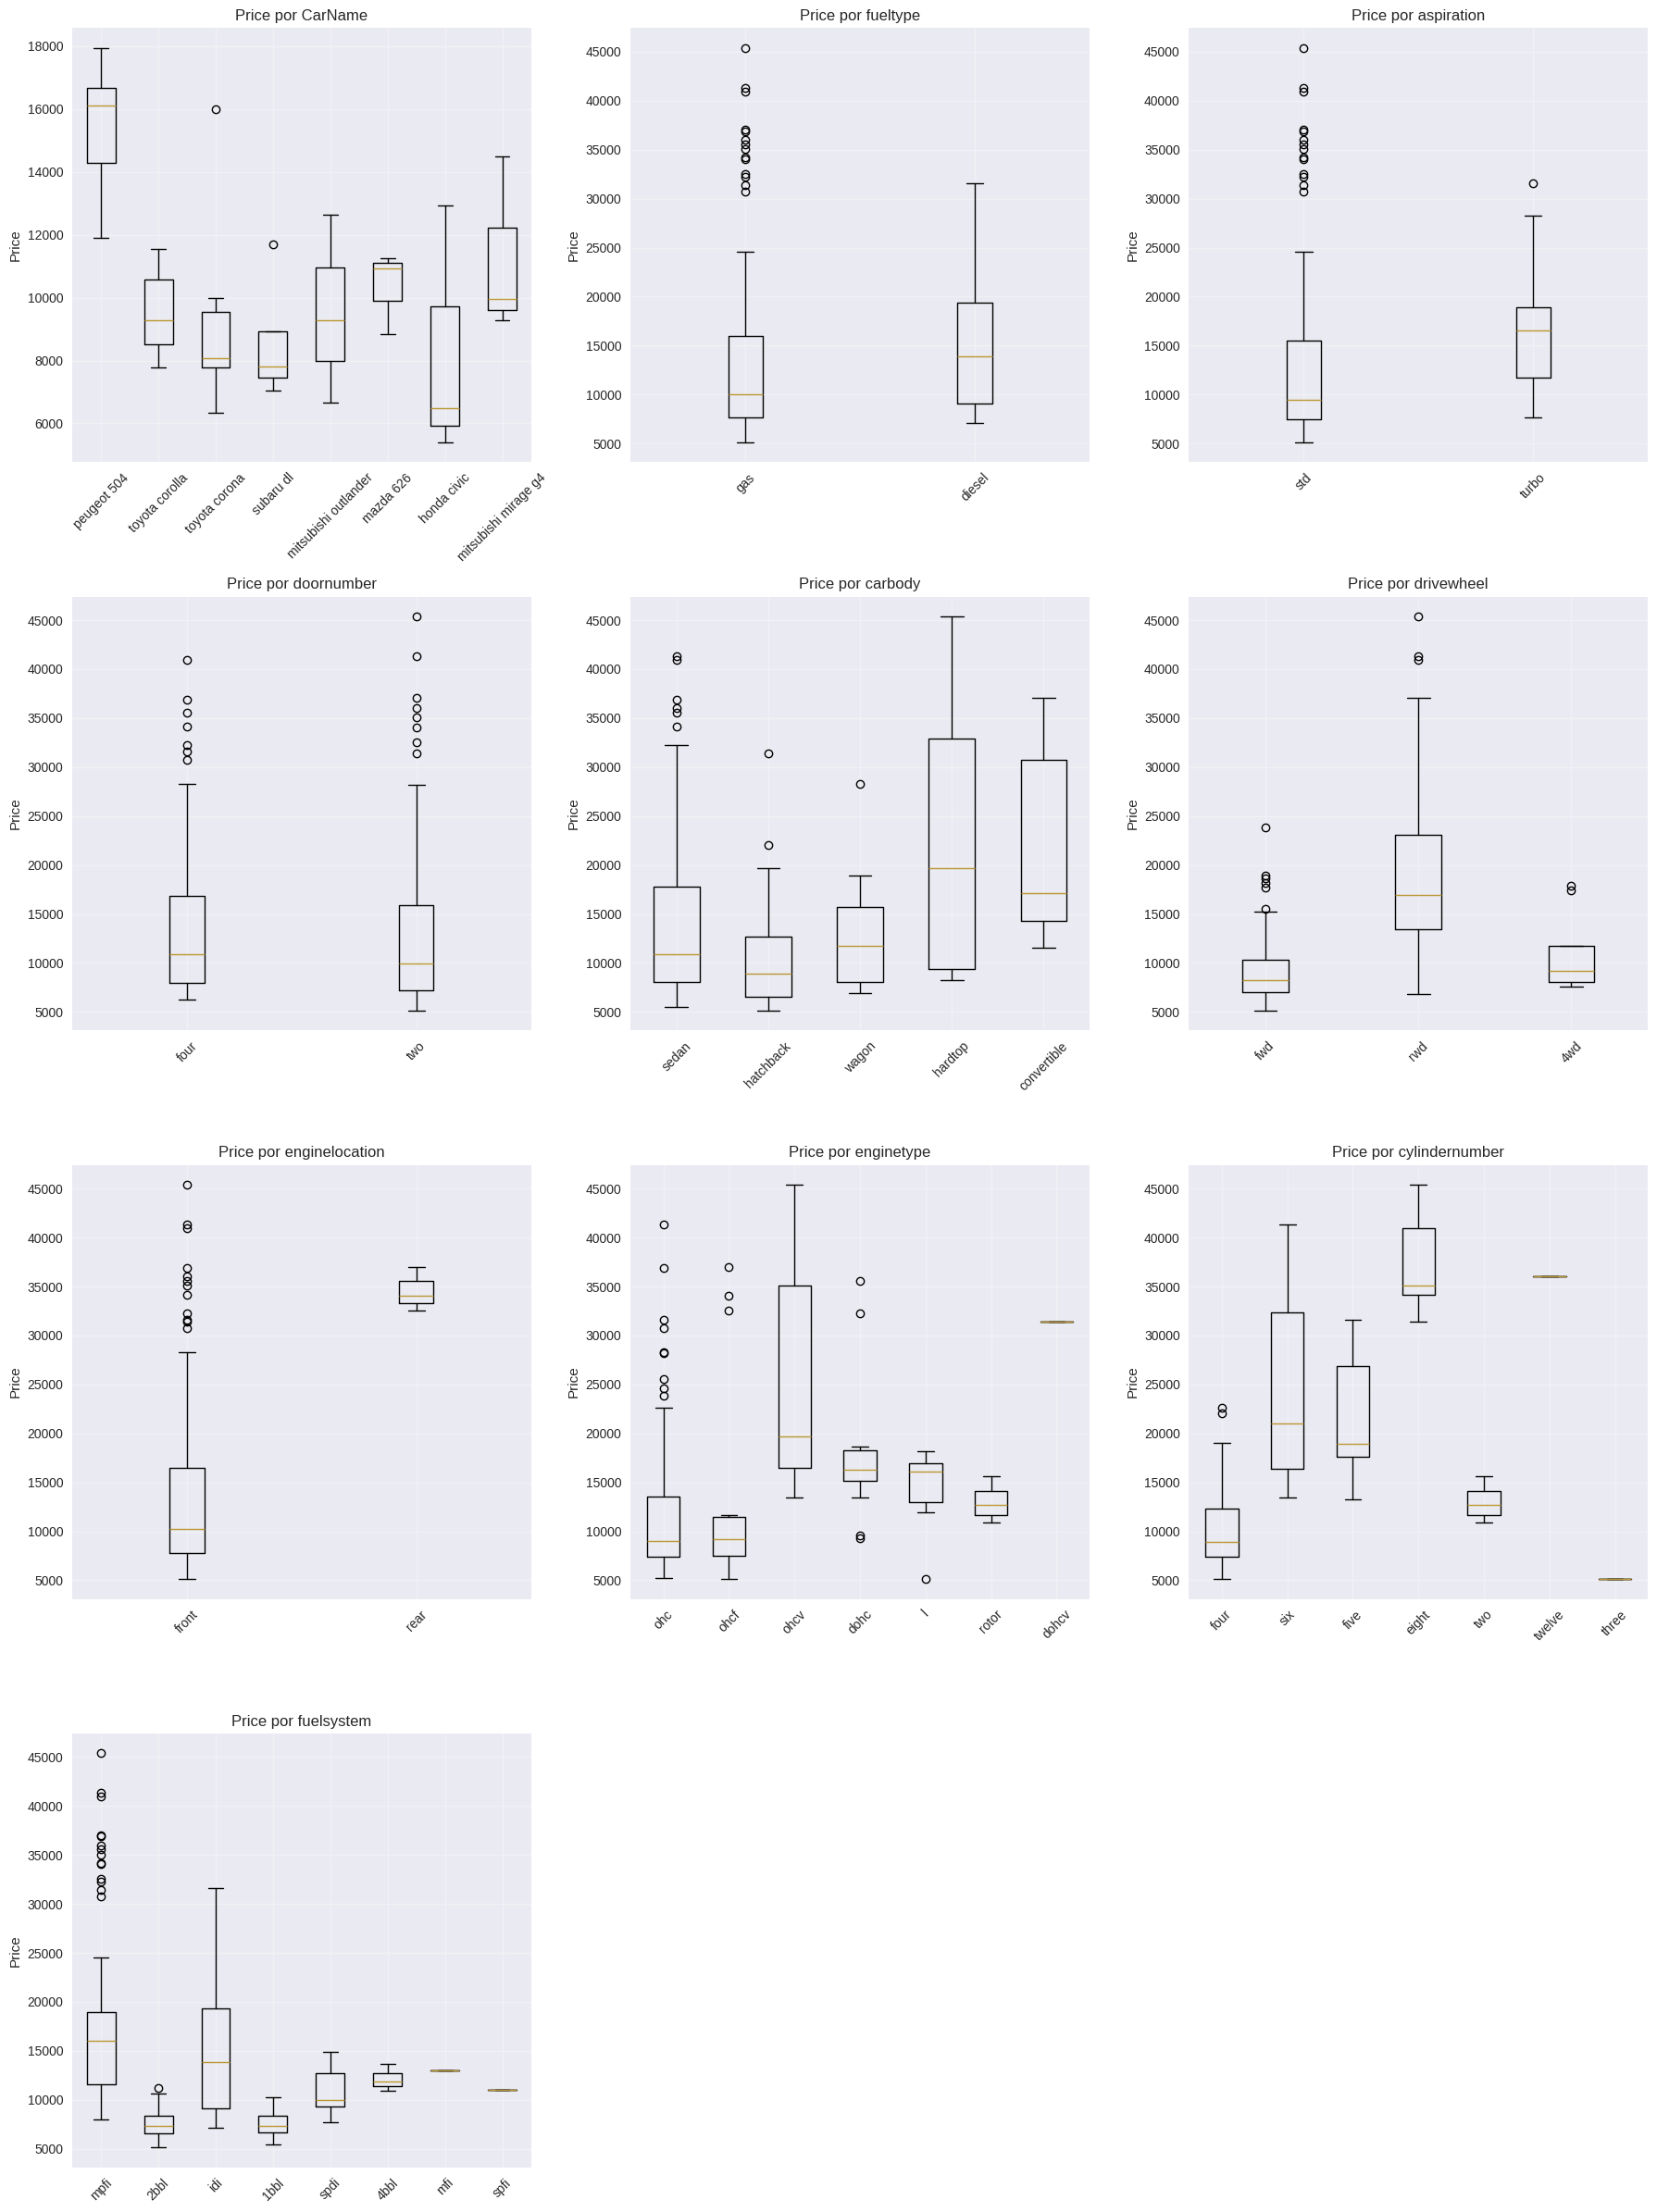


🧪 ANÁLISIS ANOVA (Analysis of Variance)

• CarName:
    F-statistic: 3.0295
    p-valor: 0.010703
    Resultado: Significativa (*)
    Estadísticas por grupo (top 5):


,count,mean,std
CarName,,,
peugeot 504,6,15435.83,2206.30
mitsubishi mirage g4,3,11242.33,2832.18
mitsubishi g4,3,10352.33,3932.46
mazda 626,3,10345.00,1307.67
toyota corolla,6,9530.00,1463.32



• fueltype:
    F-statistic: 2.2927
    p-valor: 0.131536
    Resultado: No significativa
    Estadísticas por grupo (top 5):


,count,mean,std
fueltype,,,
diesel,20,15838.15,7759.84
gas,185,12999.80,7984.41



• aspiration:
    F-statistic: 6.6366
    p-valor: 0.010700
    Resultado: Significativa (*)
    Estadísticas por grupo (top 5):


,count,mean,std
aspiration,,,
turbo,37,16298.17,6098.89
std,168,12611.27,8214.34



• doornumber:
    F-statistic: 0.2059
    p-valor: 0.650448
    Resultado: No significativa
    Estadísticas por grupo (top 5):


,count,mean,std
doornumber,,,
four,115,13501.15,7338.30
two,90,12989.92,8784.23



• carbody:
    F-statistic: 8.0320
    p-valor: 0.000005
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
carbody,,,
hardtop,8,22208.50,14555.52
convertible,6,21890.50,11187.80
sedan,96,14344.27,8470.49
wagon,25,12371.96,5120.95
hatchback,70,10376.65,4909.64



• drivewheel:
    F-statistic: 70.3206
    p-valor: 0.000000
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
drivewheel,,,
rwd,76,19910.81,9120.14
4wd,9,11087.46,3988.64
fwd,120,9239.31,3317.93



• enginelocation:
    F-statistic: 23.9697
    p-valor: 0.000002
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
enginelocation,,,
rear,3,34528.0,2291.29
front,202,12961.1,7607.98



• enginetype:
    F-statistic: 9.9622
    p-valor: 0.000000
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
enginetype,,,
ohcv,13,25098.38,11442.93
dohc,12,18116.42,7963.96
l,12,14627.58,3673.60
ohcf,15,13738.60,10930.48
rotor,4,13020.00,2079.06



• cylindernumber:
    F-statistic: 80.2656
    p-valor: 0.000000
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
cylindernumber,,,
eight,5,37400.10,5667.99
six,24,23671.83,8850.14
five,11,21630.47,6091.39
two,4,13020.00,2079.06
four,159,10285.75,3921.61



• fuelsystem:
    F-statistic: 21.8746
    p-valor: 0.000000
    Resultado: Muy significativa (***)
    Estadísticas por grupo (top 5):


,count,mean,std
fuelsystem,,,
mpfi,94,17754.60,8685.89
idi,20,15838.15,7759.84
4bbl,3,12145.00,1374.77
spdi,9,10990.44,2741.73
1bbl,11,7555.55,1390.12



💡 RECOMENDACIONES PARA VARIABLES CATEGÓRICAS:

🔍 CarName:
    • Cardinalidad: 147 valores únicos
    • ❌ Muy alta cardinalidad - considerar:
        - Eliminar la variable
        - Crear variables derivadas
        - Embeddings
    • ⚠️  137 categorías raras (<1% de frecuencia)
        - Considerar agrupar en 'Otros'

🔍 fueltype:
    • Cardinalidad: 2 valores únicos
    • ✅ Ideal para codificación binaria (0/1)

🔍 aspiration:
    • Cardinalidad: 2 valores únicos
    • ✅ Ideal para codificación binaria (0/1)

🔍 doornumber:
    • Cardinalidad: 2 valores únicos
    • ✅ Ideal para codificación binaria (0/1)

🔍 carbody:
    • Cardinalidad: 5 valores únicos
    • ✅ Buena para One-Hot Encoding

🔍 drivewheel:
    • Cardinalidad: 3 valores únicos
    • ✅ Buena para One-Hot Encoding

🔍 enginelocation:
    • Cardinalidad: 2 valores únicos
    • ✅ Ideal para codificación binaria (0/1)

🔍 enginetype:
    • Cardinalidad: 7 valores únicos
    • ✅ Buena para One-Hot Encoding
    • ⚠️  1 categorías r

In [18]:
# ============================================================================
# EDA 9.1 - ANÁLISIS COMPLETO DE VARIABLES CATEGÓRICAS
# ============================================================================

print("🏷️ ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = car_df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas encontradas: {len(categorical_cols)}")
print(f"Variables: {categorical_cols}")

if len(categorical_cols) > 0:
    # Análisis individual de cada variable categórica
    def analyze_categorical_variable(df, var_name):
        """Análisis completo de una variable categórica"""
        print(f"\n📊 ANÁLISIS DE {var_name.upper()}")
        print("-" * 40)
        
        # Estadísticas básicas
        value_counts = df[var_name].value_counts()
        print(f"• Valores únicos: {df[var_name].nunique()}")
        print(f"• Valor más frecuente: {value_counts.index[0]} ({value_counts.iloc[0]} ocurrencias)")
        print(f"• Distribución:")
        
        for value, count in value_counts.head(10).items():  # Top 10
            percentage = (count / len(df)) * 100
            print(f"    - {value}: {count} ({percentage:.1f}%)")
        
        if len(value_counts) > 10:
            print(f"    - ... y {len(value_counts) - 10} categorías más")
        
        return value_counts

    # Analizar cada variable categórica
    categorical_analysis = {}
    for cat_var in categorical_cols:
        categorical_analysis[cat_var] = analyze_categorical_variable(car_df, cat_var)
    
    # Análisis de relación entre variables categóricas y price
    if 'price' in car_df.columns:
        print("\n" + "=" * 60)
        print("🎯 RELACIÓN ENTRE VARIABLES CATEGÓRICAS Y PRICE")
        print("=" * 60)
        
        # Crear visualizaciones
        n_cats = len(categorical_cols)
        n_cols = min(3, n_cats)
        n_rows = (n_cats + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
        if n_cats == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for i, cat_var in enumerate(categorical_cols):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row, col] if n_rows > 1 else axes[col]
            
            # Boxplot de price por categoría
            data_for_plot = []
            labels_for_plot = []
            categories = car_df[cat_var].value_counts().head(8).index  # Top 8 categorías
            
            for category in categories:
                category_data = car_df[car_df[cat_var] == category]['price'].dropna()
                if len(category_data) > 0:
                    data_for_plot.append(category_data)
                    labels_for_plot.append(category)
            
            if data_for_plot:
                ax.boxplot(data_for_plot, labels=labels_for_plot)
                ax.set_title(f'Price por {cat_var}', fontsize=12)
                ax.set_ylabel('Price')
                ax.tick_params(axis='x', rotation=45)
                ax.grid(True, alpha=0.3)
        
        # Ocultar subplots vacíos
        for i in range(n_cats, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows > 1:
                axes[row, col].set_visible(False)
            else:
                axes[col].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Análisis estadístico ANOVA
        print("\n🧪 ANÁLISIS ANOVA (Analysis of Variance)")
        print("=" * 50)
        
        from scipy.stats import f_oneway
        
        for cat_var in categorical_cols:
            try:
                # Agrupar price por categoría
                groups = []
                categories = car_df[cat_var].value_counts().head(10).index  # Top 10 para evitar grupos muy pequeños
                
                for category in categories:
                    group_data = car_df[car_df[cat_var] == category]['price'].dropna()
                    if len(group_data) >= 3:  # Mínimo 3 observaciones por grupo
                        groups.append(group_data)
                
                if len(groups) >= 2:
                    f_stat, p_value = f_oneway(*groups)
                    print(f"\n• {cat_var}:")
                    print(f"    F-statistic: {f_stat:.4f}")
                    print(f"    p-valor: {p_value:.6f}")
                    
                    if p_value < 0.001:
                        significance = "Muy significativa (***)"
                    elif p_value < 0.01:
                        significance = "Significativa (**)"
                    elif p_value < 0.05:
                        significance = "Significativa (*)"
                    else:
                        significance = "No significativa"
                    
                    print(f"    Resultado: {significance}")
                    
                    # Calcular estadísticas descriptivas por grupo
                    group_stats = car_df.groupby(cat_var)['price'].agg(['count', 'mean', 'std']).round(2)
                    group_stats = group_stats[group_stats['count'] >= 3].sort_values('mean', ascending=False)
                    
                    print(f"    Estadísticas por grupo (top 5):")
                    display(group_stats.head())
                
            except Exception as e:
                print(f"Error en ANOVA para {cat_var}: {e}")
        
        # Análisis de cardinalidad y recomendaciones
        print("\n💡 RECOMENDACIONES PARA VARIABLES CATEGÓRICAS:")
        print("=" * 60)
        
        for cat_var in categorical_cols:
            unique_count = car_df[cat_var].nunique()
            total_count = len(car_df)
            
            print(f"\n🔍 {cat_var}:")
            print(f"    • Cardinalidad: {unique_count} valores únicos")
            
            if unique_count == 2:
                print("    • ✅ Ideal para codificación binaria (0/1)")
            elif unique_count <= 10:
                print("    • ✅ Buena para One-Hot Encoding")
            elif unique_count <= 50:
                print("    • ⚠️  Alta cardinalidad - considerar:")
                print("        - Agrupación de categorías similares")
                print("        - Target encoding")
                print("        - Frequency encoding")
            else:
                print("    • ❌ Muy alta cardinalidad - considerar:")
                print("        - Eliminar la variable")
                print("        - Crear variables derivadas")
                print("        - Embeddings")
            
            # Verificar distribución
            value_counts = car_df[cat_var].value_counts()
            rare_categories = (value_counts < len(car_df) * 0.01).sum()  # <1% de frecuencia
            
            if rare_categories > 0:
                print(f"    • ⚠️  {rare_categories} categorías raras (<1% de frecuencia)")
                print("        - Considerar agrupar en 'Otros'")

else:
    print("ℹ️  No se encontraron variables categóricas en el dataset")
    print("📝 El dataset contiene solo variables numéricas")

**EDA 9.2 - Análisis Avanzado de Outliers**

Los outliers pueden tener un impacto significativo en los modelos de regresión lineal. Realizaremos un análisis completo utilizando múltiples métodos de detección.

🔍 ANÁLISIS COMPLETO DE OUTLIERS
Analizando outliers en 16 variables numéricas

📊 DETECCIÓN DE OUTLIERS POR VARIABLE

🔍 Análisis de outliers en car_ID:
------------------------------
  • IQR Method: 0 outliers (0.0%)
    Rango normal: [-101.00, 307.00]
  • Z-score Method: 0 outliers (0.0%)
  • Modified Z-score (MAD): 0 outliers (0.0%)

🔍 Análisis de outliers en symboling:
------------------------------
  • IQR Method: 0 outliers (0.0%)
    Rango normal: [-3.00, 5.00]
  • Z-score Method: 0 outliers (0.0%)
  • Modified Z-score (MAD): 0 outliers (0.0%)

🔍 Análisis de outliers en wheelbase:
------------------------------
  • IQR Method: 3 outliers (1.5%)
    Rango normal: [82.65, 114.25]
  • Z-score Method: 1 outliers (0.5%)
  • Modified Z-score (MAD): 10 outliers (4.9%)

🔍 Análisis de outliers en carlength:
------------------------------
  • IQR Method: 1 outliers (0.5%)
    Rango normal: [141.10, 208.30]
  • Z-score Method: 0 outliers (0.0%)
  • Modified Z-score (MAD): 0 outliers (0.0%)



,IQR,Z-score,MAD,Total_observations
car_ID,0,0,0,205
symboling,0,0,0,205
wheelbase,3,1,10,205
carlength,1,0,0,205
carwidth,8,0,0,205
carheight,0,0,0,205
curbweight,0,0,0,205
enginesize,10,5,5,205
boreratio,0,0,0,205
stroke,20,3,6,205



📈 VISUALIZACIONES DE OUTLIERS


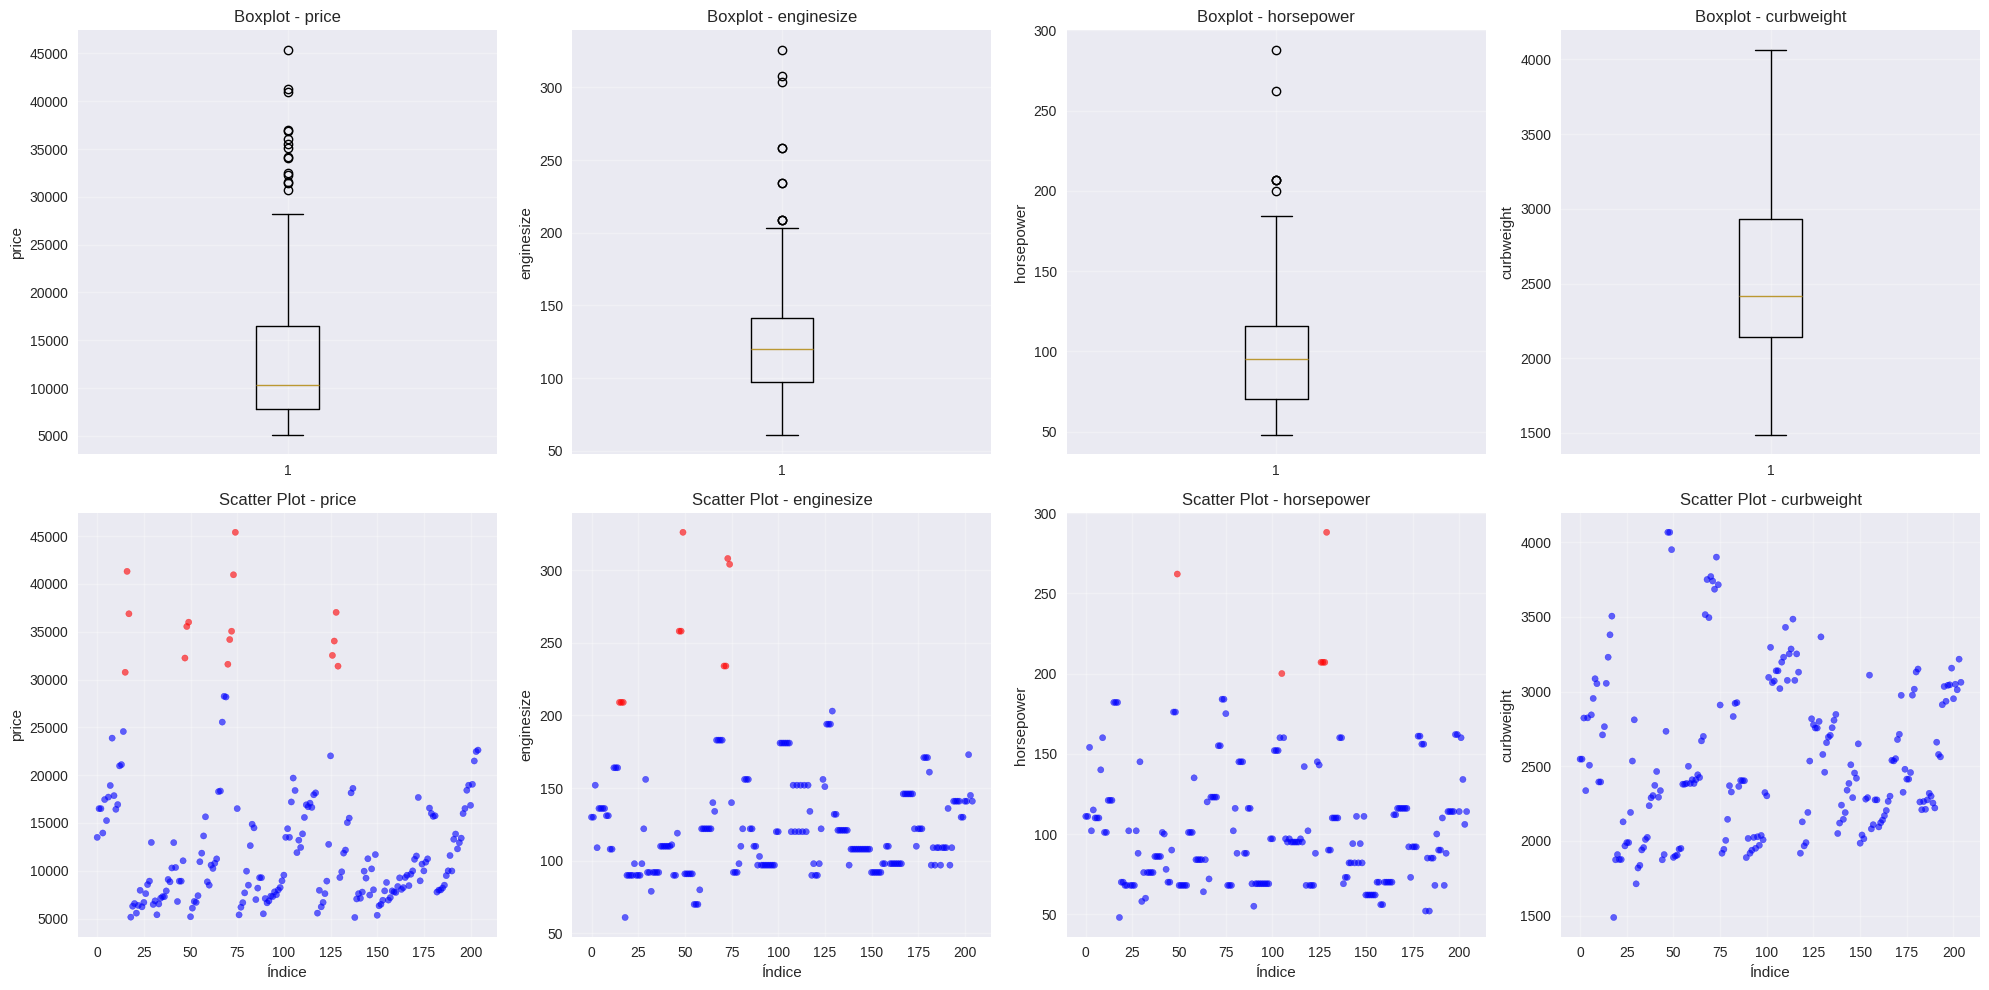


🌲 ANÁLISIS MULTIVARIADO DE OUTLIERS (Isolation Forest)
• Outliers detectados: 21 (10.2%)

📋 Primeras 5 observaciones identificadas como outliers:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
17,18,0,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182,5400,15,20,36880.0
18,19,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,58,4800,49,54,6479.0
47,48,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,35550.0



📊 Comparación outliers vs datos normales:


,Outliers_Mean,Normal_Mean,Difference,Outliers_Std,Normal_Std,Z_Score_Diff
price,26036.64,11820.41,14216.23,12171.22,5842.89,2.433081
enginesize,189.24,119.79,69.44,74.39,28.84,2.408094
curbweight,3255.00,2475.74,779.26,753.83,421.39,1.849269
carwidth,68.60,65.60,3.00,3.24,1.75,1.715737
wheelbase,105.80,97.95,7.85,10.21,4.76,1.647972
carlength,186.40,172.64,13.76,18.68,10.59,1.299799
horsepower,140.43,99.97,40.46,65.46,33.26,1.216425
compressionratio,13.17,9.80,3.37,6.25,3.49,0.966894
peakrpm,4809.52,5161.14,-351.62,481.82,464.24,0.757413
highwaympg,27.19,31.16,-3.97,11.81,6.00,0.661645



💡 RECOMENDACIONES PARA MANEJO DE OUTLIERS
🔍 Estrategias recomendadas:

📊 car_ID:
    ✅ Pocos outliers (<5%) - Mantener datos originales
📊 symboling:
    ✅ Pocos outliers (<5%) - Mantener datos originales
📊 wheelbase:
    ✅ Pocos outliers (<5%) - Mantener datos originales
📊 carlength:
    ✅ Pocos outliers (<5%) - Mantener datos originales
📊 carwidth:
    ✅ Pocos outliers (<5%) - Mantener datos originales

🎯 Para el modelo de regresión lineal:
• Los outliers pueden sesgar significativamente los coeficientes
• Considerar usar regresión robusta (Huber, RANSAC)
• Evaluar modelo con y sin outliers
• Validar que los outliers no sean errores de datos


In [19]:
# ============================================================================
# EDA 9.2 - ANÁLISIS AVANZADO DE OUTLIERS
# ============================================================================

print("🔍 ANÁLISIS COMPLETO DE OUTLIERS")
print("=" * 60)

# Seleccionar variables numéricas para análisis de outliers
numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Analizando outliers en {len(numeric_cols)} variables numéricas")

# Función para detectar outliers por IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Función para detectar outliers por Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.dropna()))
    outliers_idx = np.where(z_scores > threshold)[0]
    outliers = data.iloc[outliers_idx]
    return outliers, z_scores

# Función para detectar outliers por Z-score modificado (MAD)
def detect_outliers_modified_zscore(data, threshold=3.5):
    median = np.median(data.dropna())
    mad = np.median(np.abs(data.dropna() - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    outliers = data[np.abs(modified_z_scores) > threshold]
    return outliers, modified_z_scores

# Análisis de outliers por variable
outlier_summary = {}

print("\n📊 DETECCIÓN DE OUTLIERS POR VARIABLE")
print("=" * 60)

for col in numeric_cols:
    print(f"\n🔍 Análisis de outliers en {col}:")
    print("-" * 30)
    
    # Eliminar valores nulos para el análisis
    clean_data = car_df[col].dropna()
    
    if len(clean_data) == 0:
        print("  ❌ No hay datos válidos para analizar")
        continue
    
    # Método 1: IQR
    outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(clean_data)
    
    # Método 2: Z-score
    outliers_zscore, z_scores = detect_outliers_zscore(clean_data)
    
    # Método 3: Z-score modificado (MAD)
    outliers_mad, mad_scores = detect_outliers_modified_zscore(clean_data)
    
    # Resumen
    outlier_summary[col] = {
        'IQR': len(outliers_iqr),
        'Z-score': len(outliers_zscore),
        'MAD': len(outliers_mad),
        'Total_observations': len(clean_data)
    }
    
    print(f"  • IQR Method: {len(outliers_iqr)} outliers ({len(outliers_iqr)/len(clean_data)*100:.1f}%)")
    print(f"    Rango normal: [{lower_iqr:.2f}, {upper_iqr:.2f}]")
    
    print(f"  • Z-score Method: {len(outliers_zscore)} outliers ({len(outliers_zscore)/len(clean_data)*100:.1f}%)")
    print(f"  • Modified Z-score (MAD): {len(outliers_mad)} outliers ({len(outliers_mad)/len(clean_data)*100:.1f}%)")

# Crear DataFrame resumen
outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)

# Visualizaciones de outliers
print("\n📈 VISUALIZACIONES DE OUTLIERS")
print("=" * 50)

# Seleccionar las variables más importantes para visualización
important_vars = ['price', 'enginesize', 'horsepower', 'curbweight'] if all(var in numeric_cols for var in ['price', 'enginesize', 'horsepower', 'curbweight']) else numeric_cols[:4]
important_vars = [var for var in important_vars if var in car_df.columns][:4]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, var in enumerate(important_vars):
    if var in car_df.columns:
        # Boxplot
        axes[0, i].boxplot(car_df[var].dropna())
        axes[0, i].set_title(f'Boxplot - {var}')
        axes[0, i].set_ylabel(var)
        axes[0, i].grid(True, alpha=0.3)
        
        # Scatter plot con colores para outliers
        clean_data = car_df[var].dropna()
        outliers_iqr, _, _ = detect_outliers_iqr(clean_data)
        
        # Crear colores: rojo para outliers, azul para normales
        colors = ['red' if x in outliers_iqr.values else 'blue' for x in clean_data]
        
        axes[1, i].scatter(range(len(clean_data)), clean_data, c=colors, alpha=0.6, s=20)
        axes[1, i].set_title(f'Scatter Plot - {var}')
        axes[1, i].set_ylabel(var)
        axes[1, i].set_xlabel('Índice')
        axes[1, i].grid(True, alpha=0.3)

# Ocultar subplots vacíos
for j in range(len(important_vars), 4):
    axes[0, j].set_visible(False)
    axes[1, j].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis multivariado de outliers usando Isolation Forest
print("\n🌲 ANÁLISIS MULTIVARIADO DE OUTLIERS (Isolation Forest)")
print("=" * 60)

try:
    from sklearn.ensemble import IsolationForest
    from sklearn.preprocessing import StandardScaler
    
    # Preparar datos para Isolation Forest
    numeric_data = car_df[numeric_cols].dropna()
    
    if len(numeric_data) > 0:
        # Estandarizar los datos
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numeric_data)
        
        # Aplicar Isolation Forest
        iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 10% de outliers esperados
        outlier_labels = iso_forest.fit_predict(scaled_data)
        
        # -1 indica outlier, 1 indica normal
        outliers_count = np.sum(outlier_labels == -1)
        
        print(f"• Outliers detectados: {outliers_count} ({outliers_count/len(numeric_data)*100:.1f}%)")
        
        # Agregar información de outliers al dataset original
        outlier_info = pd.DataFrame({
            'Index': numeric_data.index,
            'Is_Outlier': outlier_labels == -1
        })
        
        # Mostrar algunas observaciones identificadas como outliers
        outlier_indices = numeric_data.index[outlier_labels == -1]
        if len(outlier_indices) > 0:
            print(f"\n📋 Primeras 5 observaciones identificadas como outliers:")
            outlier_sample = car_df.loc[outlier_indices[:5], numeric_cols]
            display(outlier_sample)
            
            # Análisis de qué variables contribuyen más a los outliers
            outlier_data = car_df.loc[outlier_indices, numeric_cols]
            normal_data = car_df.loc[car_df.index.difference(outlier_indices), numeric_cols]
            
            print(f"\n📊 Comparación outliers vs datos normales:")
            comparison = pd.DataFrame({
                'Outliers_Mean': outlier_data.mean(),
                'Normal_Mean': normal_data.mean(),
                'Difference': outlier_data.mean() - normal_data.mean(),
                'Outliers_Std': outlier_data.std(),
                'Normal_Std': normal_data.std()
            }).round(2)
            
            # Calcular z-score de las diferencias
            comparison['Z_Score_Diff'] = np.abs(comparison['Difference'] / normal_data.std())
            comparison = comparison.sort_values('Z_Score_Diff', ascending=False)
            
            display(comparison)
            
except ImportError:
    print("❌ scikit-learn no disponible para Isolation Forest")
except Exception as e:
    print(f"❌ Error en análisis multivariado: {e}")

# Recomendaciones para manejo de outliers
print("\n💡 RECOMENDACIONES PARA MANEJO DE OUTLIERS")
print("=" * 60)

print("🔍 Estrategias recomendadas:")
print()

for col in outlier_df.index[:5]:  # Top 5 variables con más outliers
    iqr_outliers = outlier_df.loc[col, 'IQR']
    total_obs = outlier_df.loc[col, 'Total_observations']
    percentage = (iqr_outliers / total_obs) * 100
    
    print(f"📊 {col}:")
    if percentage < 5:
        print("    ✅ Pocos outliers (<5%) - Mantener datos originales")
    elif percentage < 10:
        print("    ⚠️  Outliers moderados (5-10%) - Considerar:")
        print("        • Transformación logarítmica")
        print("        • Winsorización (reemplazar por percentiles)")
    else:
        print("    ❌ Muchos outliers (>10%) - Considerar:")
        print("        • Investigar causa de los outliers")
        print("        • Segmentación de datos")
        print("        • Modelos robustos a outliers")
        print("        • Eliminación cuidadosa")

print(f"\n🎯 Para el modelo de regresión lineal:")
print("• Los outliers pueden sesgar significativamente los coeficientes")
print("• Considerar usar regresión robusta (Huber, RANSAC)")
print("• Evaluar modelo con y sin outliers")
print("• Validar que los outliers no sean errores de datos")

**EDA 10**

**Visualización de la relación entre la variable candidata y price**

**Diagrama de dispersión:** Permite observar la relación entre enginesize y price de manera visual.

**Línea de regresión:** sns.regplot añade una línea de tendencia (regresión) que facilita ver si la relación es lineal.

**Validación visual:** Este paso confirma la hipótesis basada en la matriz de correlación y ayuda a decidir si enginesize es una buena variable predictora para price.



🔗 ANÁLISIS DETALLADO DE RELACIONES BIVARIADAS

🔍 ANÁLISIS: ENGINESIZE vs PRICE
📊 Correlaciones:
• Pearson: 0.8741 (p-valor: 0.000000)
• Spearman: 0.8260 (p-valor: 0.000000)
• Interpretación Pearson: Fuerte
• Interpretación Spearman: Fuerte
✅ Relación aproximadamente lineal

🔍 ANÁLISIS: CURBWEIGHT vs PRICE
📊 Correlaciones:
• Pearson: 0.8353 (p-valor: 0.000000)
• Spearman: 0.9091 (p-valor: 0.000000)
• Interpretación Pearson: Fuerte
• Interpretación Spearman: Muy fuerte
✅ Relación aproximadamente lineal

🔍 ANÁLISIS: HORSEPOWER vs PRICE
📊 Correlaciones:
• Pearson: 0.8081 (p-valor: 0.000000)
• Spearman: 0.8546 (p-valor: 0.000000)
• Interpretación Pearson: Fuerte
• Interpretación Spearman: Fuerte
✅ Relación aproximadamente lineal

🔍 ANÁLISIS: CARWIDTH vs PRICE
📊 Correlaciones:
• Pearson: 0.7593 (p-valor: 0.000000)
• Spearman: 0.8114 (p-valor: 0.000000)
• Interpretación Pearson: Fuerte
• Interpretación Spearman: Fuerte
✅ Relación aproximadamente lineal


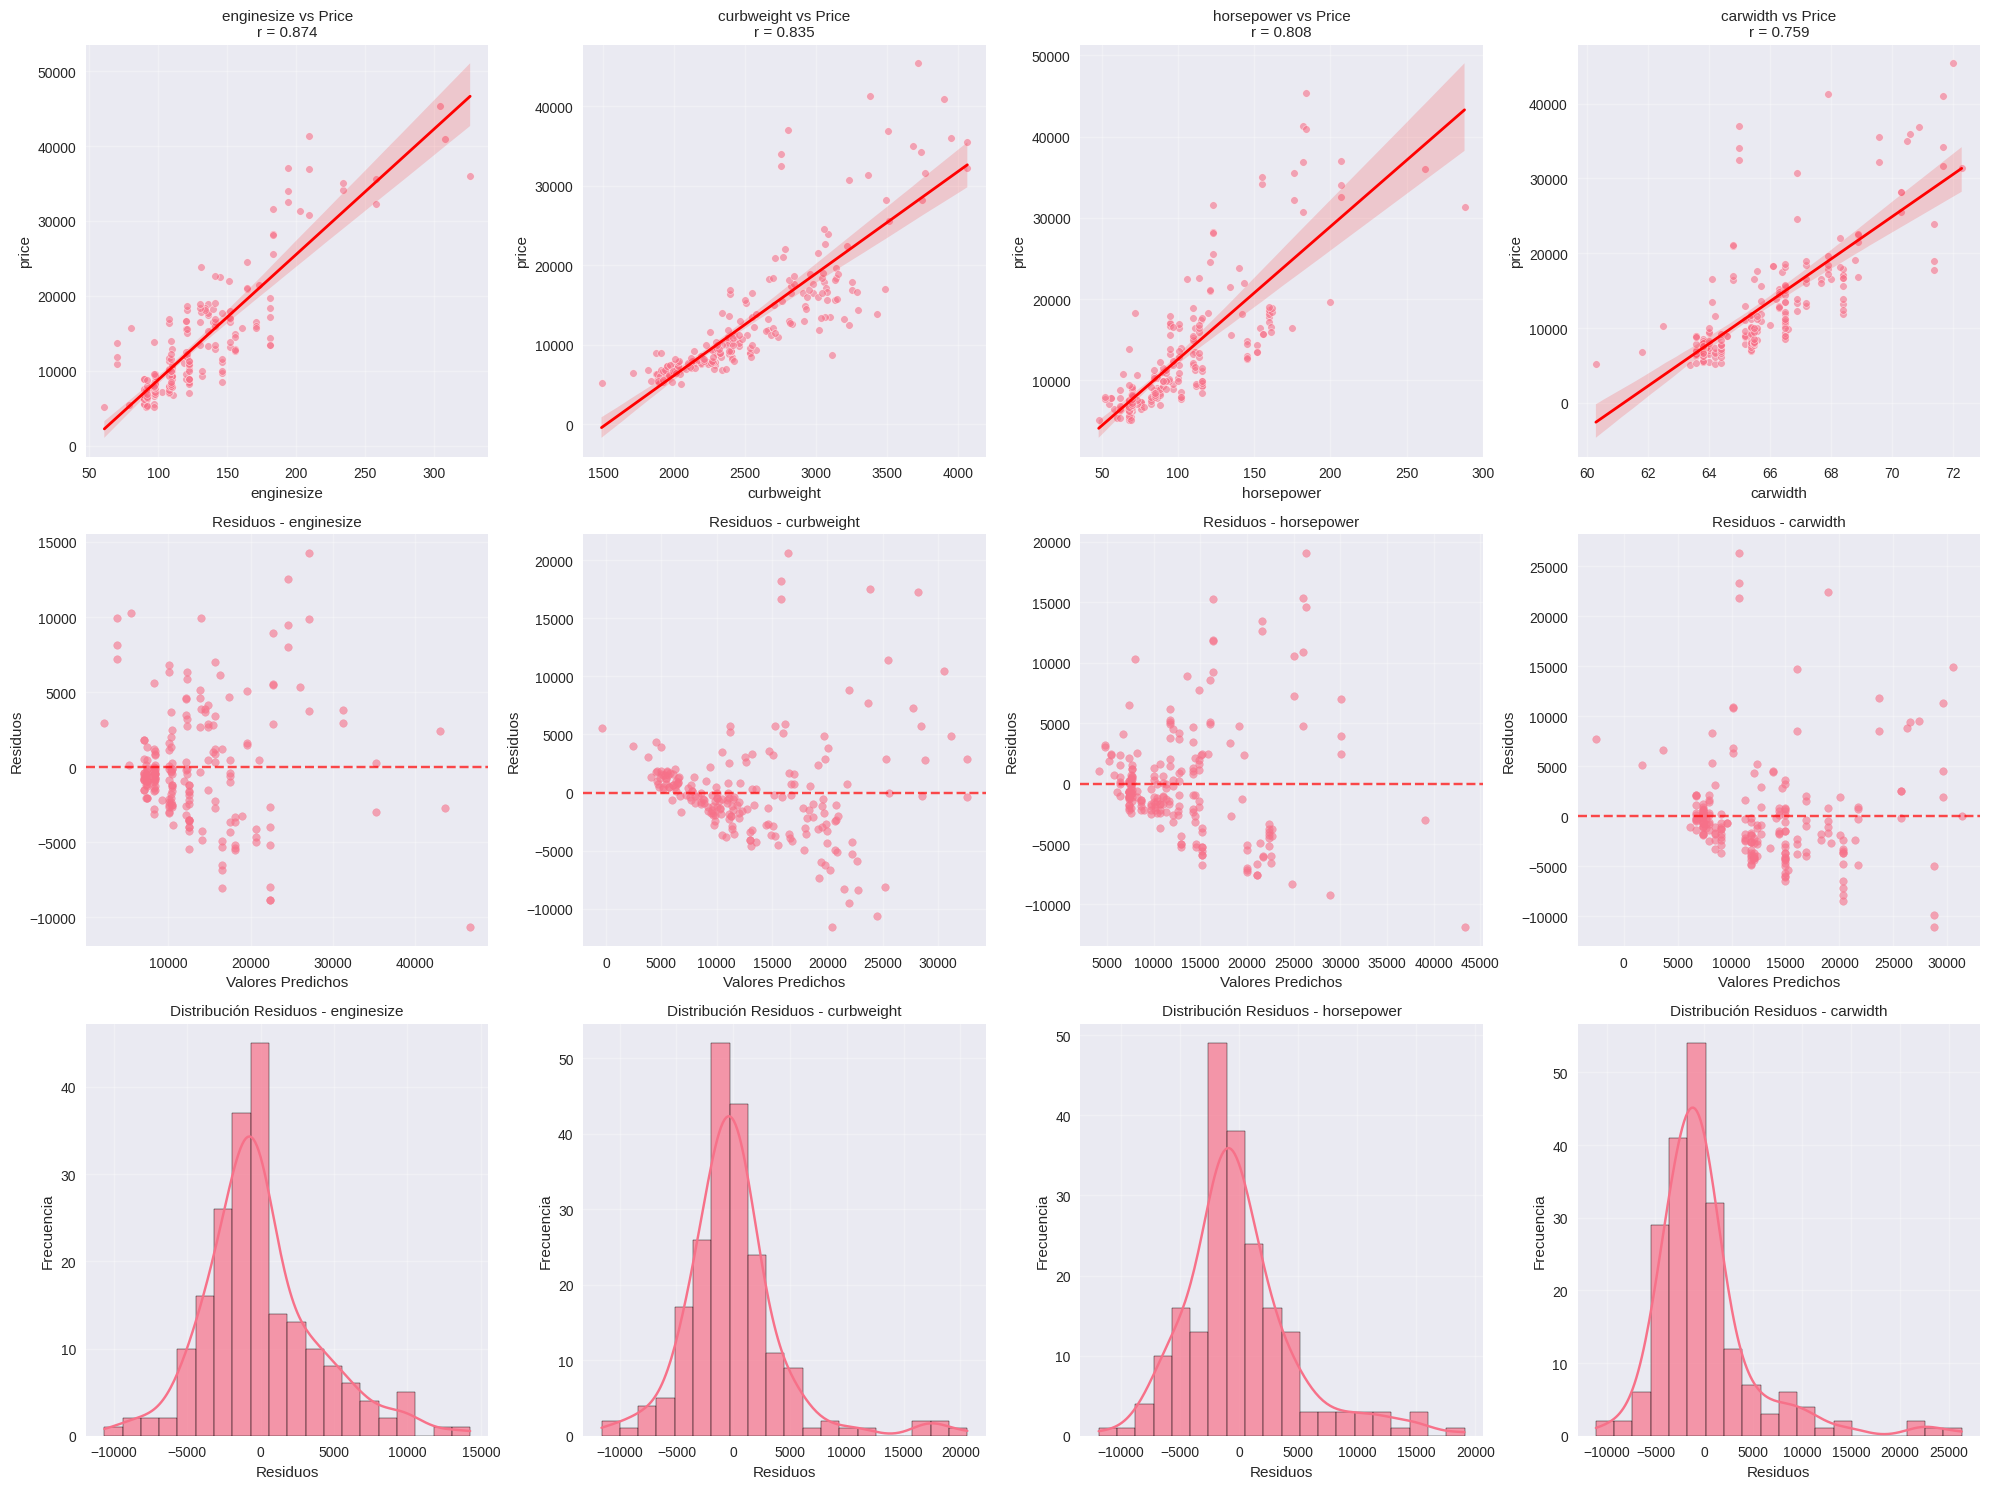


🚗 ANÁLISIS ESPECÍFICO: ENGINE SIZE vs PRICE
📊 Estadísticas de Price por categorías de Engine Size:


,count,mean,median,std,min,max
enginesize_category,,,,,,
Muy Pequeño,101,8349.50,7788.0,2398.50,5118.0,16925.0
Pequeño,76,14409.02,14174.5,4261.22,6989.0,24565.0
Mediano,21,24949.55,25552.0,8915.00,13499.0,41315.0
Grande,4,34260.00,34620.0,1454.14,32250.0,35550.0
Muy Grande,3,40786.67,40960.0,4702.40,36000.0,45400.0


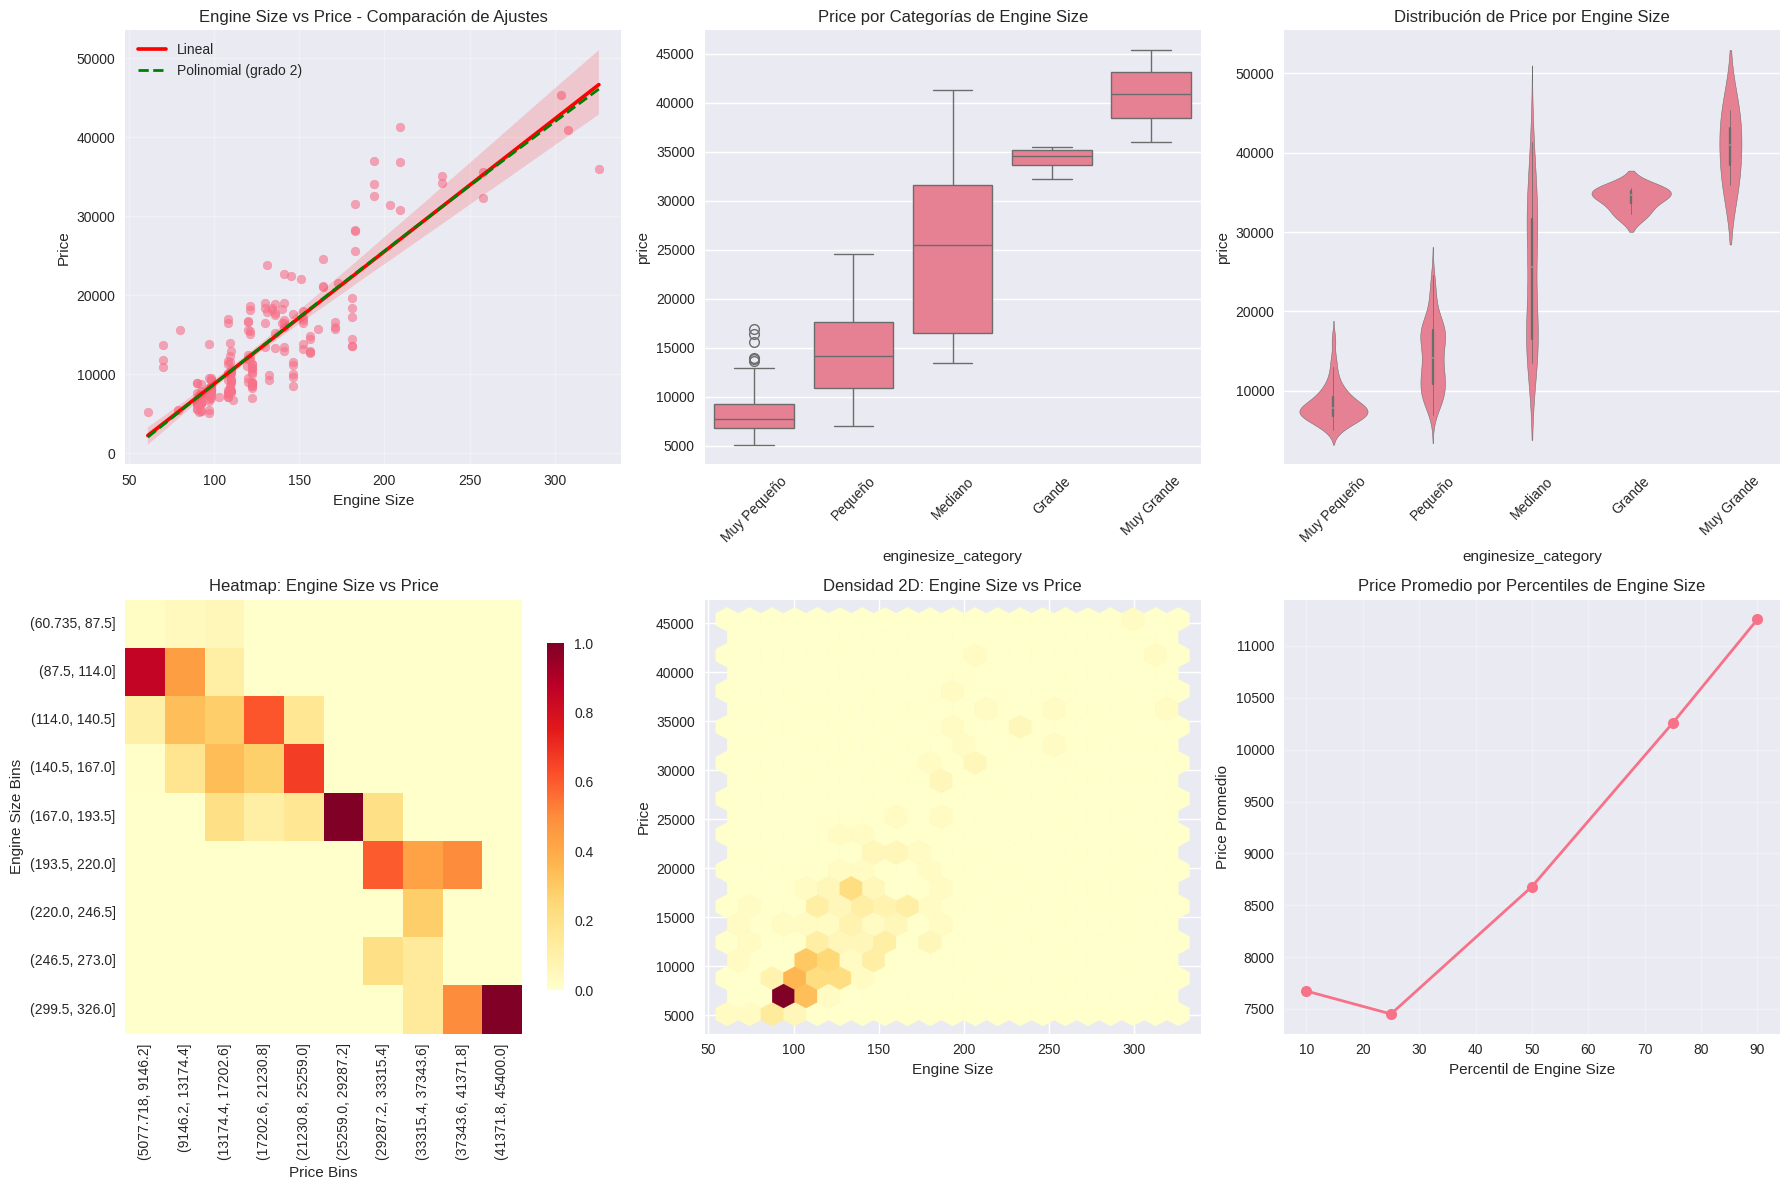


🔬 ANÁLISIS DE REGRESIÓN DETALLADO
📈 Comparación de modelos:
• Regresión Lineal:
    R² = 0.7641
    RMSE = 3870.43
    Ecuación: Price = -8005.45 + 167.70 × Engine Size
• Regresión Polinomial (grado 2):
    R² = 0.7642
    RMSE = 3869.58
• Mejora del modelo polinomial: 0.0%
✅ El modelo lineal es suficiente para esta relación


In [20]:
# ============================================================================
# EDA 10 - ANÁLISIS AVANZADO DE RELACIONES BIVARIADAS
# ============================================================================

print("🔗 ANÁLISIS DETALLADO DE RELACIONES BIVARIADAS")
print("=" * 60)

# Función para análisis completo de relación bivariada
def analyze_bivariate_relationship(df, x_var, y_var='price'):
    """Análisis completo de la relación entre dos variables"""
    
    if x_var not in df.columns or y_var not in df.columns:
        print(f"❌ Variables {x_var} o {y_var} no encontradas")
        return
    
    # Limpiar datos
    clean_data = df[[x_var, y_var]].dropna()
    
    if len(clean_data) < 10:
        print(f"❌ Insuficientes datos para análisis ({len(clean_data)} observaciones)")
        return
    
    print(f"\n🔍 ANÁLISIS: {x_var.upper()} vs {y_var.upper()}")
    print("=" * 50)
    
    # Estadísticas de correlación
    pearson_corr, pearson_p = stats.pearsonr(clean_data[x_var], clean_data[y_var])
    spearman_corr, spearman_p = stats.spearmanr(clean_data[x_var], clean_data[y_var])
    
    print(f"📊 Correlaciones:")
    print(f"• Pearson: {pearson_corr:.4f} (p-valor: {pearson_p:.6f})")
    print(f"• Spearman: {spearman_corr:.4f} (p-valor: {spearman_p:.6f})")
    
    # Interpretación de correlación
    def interpret_correlation(r):
        if abs(r) >= 0.9:
            return "Muy fuerte"
        elif abs(r) >= 0.7:
            return "Fuerte"
        elif abs(r) >= 0.5:
            return "Moderada"
        elif abs(r) >= 0.3:
            return "Débil"
        else:
            return "Muy débil"
    
    print(f"• Interpretación Pearson: {interpret_correlation(pearson_corr)}")
    print(f"• Interpretación Spearman: {interpret_correlation(spearman_corr)}")
    
    # Test de linealidad
    diff_correlations = abs(pearson_corr - spearman_corr)
    if diff_correlations > 0.1:
        print(f"⚠️  Diferencia significativa entre correlaciones ({diff_correlations:.3f})")
        print("   Posible relación no lineal")
    else:
        print("✅ Relación aproximadamente lineal")
    
    return clean_data, pearson_corr, spearman_corr

# Identificar las mejores variables para análisis bivariado
if 'price' in car_df.columns:
    numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
    price_correlations = car_df[numeric_cols].corr()['price'].drop('price').sort_values(key=abs, ascending=False)
    
    # Analizar las top 4 variables más correlacionadas
    top_vars = price_correlations.head(4).index.tolist()
    
    # Crear visualizaciones avanzadas
    fig = plt.figure(figsize=(20, 15))
    
    analysis_results = {}
    
    for i, var in enumerate(top_vars):
        if var in car_df.columns:
            # Análisis estadístico
            clean_data, pearson_r, spearman_r = analyze_bivariate_relationship(car_df, var, 'price')
            analysis_results[var] = {'pearson': pearson_r, 'spearman': spearman_r}
            
            # Subplot 1: Scatter plot con línea de regresión
            plt.subplot(3, 4, i+1)
            sns.scatterplot(data=clean_data, x=var, y='price', alpha=0.6, s=30)
            sns.regplot(data=clean_data, x=var, y='price', scatter=False, color='red', line_kws={'linewidth': 2})
            plt.title(f'{var} vs Price\nr = {pearson_r:.3f}', fontsize=11)
            plt.grid(True, alpha=0.3)
            
            # Subplot 2: Residuos de la regresión
            plt.subplot(3, 4, i+5)
            
            # Calcular residuos
            from sklearn.linear_model import LinearRegression
            reg = LinearRegression()
            X_reshaped = clean_data[var].values.reshape(-1, 1)
            reg.fit(X_reshaped, clean_data['price'])
            predictions = reg.predict(X_reshaped)
            residuals = clean_data['price'] - predictions
            
            plt.scatter(predictions, residuals, alpha=0.6, s=30)
            plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
            plt.xlabel('Valores Predichos')
            plt.ylabel('Residuos')
            plt.title(f'Residuos - {var}', fontsize=11)
            plt.grid(True, alpha=0.3)
            
            # Subplot 3: Distribución de residuos
            plt.subplot(3, 4, i+9)
            sns.histplot(residuals, kde=True, bins=20, alpha=0.7)
            plt.xlabel('Residuos')
            plt.ylabel('Frecuencia')
            plt.title(f'Distribución Residuos - {var}', fontsize=11)
            plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de enginesize específicamente (si existe)
    if 'enginesize' in car_df.columns:
        print("\n" + "="*60)
        print("🚗 ANÁLISIS ESPECÍFICO: ENGINE SIZE vs PRICE")
        print("="*60)
        
        # Análisis más detallado de enginesize
        enginesize_data = car_df[['enginesize', 'price']].dropna()
        
        # Crear bins para enginesize
        enginesize_data['enginesize_category'] = pd.cut(
            enginesize_data['enginesize'], 
            bins=5, 
            labels=['Muy Pequeño', 'Pequeño', 'Mediano', 'Grande', 'Muy Grande']
        )
        
        # Estadísticas por categoría
        category_stats = enginesize_data.groupby('enginesize_category')['price'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)
        
        print("📊 Estadísticas de Price por categorías de Engine Size:")
        display(category_stats)
        
        # Visualización avanzada para enginesize
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. Scatter plot principal
        axes[0,0].scatter(enginesize_data['enginesize'], enginesize_data['price'], alpha=0.6, s=40)
        
        # Añadir líneas de regresión múltiples
        sns.regplot(data=enginesize_data, x='enginesize', y='price', 
                   scatter=False, ax=axes[0,0], color='red', label='Lineal')
        
        # Regresión polinomial grado 2
        z = np.polyfit(enginesize_data['enginesize'], enginesize_data['price'], 2)
        p = np.poly1d(z)
        x_smooth = np.linspace(enginesize_data['enginesize'].min(), 
                              enginesize_data['enginesize'].max(), 100)
        axes[0,0].plot(x_smooth, p(x_smooth), color='green', linestyle='--', 
                      linewidth=2, label='Polinomial (grado 2)')
        
        axes[0,0].set_xlabel('Engine Size')
        axes[0,0].set_ylabel('Price')
        axes[0,0].set_title('Engine Size vs Price - Comparación de Ajustes')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Boxplot por categorías
        sns.boxplot(data=enginesize_data, x='enginesize_category', y='price', ax=axes[0,1])
        axes[0,1].set_title('Price por Categorías de Engine Size')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Violin plot
        sns.violinplot(data=enginesize_data, x='enginesize_category', y='price', ax=axes[0,2])
        axes[0,2].set_title('Distribución de Price por Engine Size')
        axes[0,2].tick_params(axis='x', rotation=45)
        
        # 4. Heatmap de correlación por bins
        enginesize_bins = pd.cut(enginesize_data['enginesize'], bins=10)
        price_bins = pd.cut(enginesize_data['price'], bins=10)
        heatmap_data = pd.crosstab(enginesize_bins, price_bins, normalize='columns')
        
        sns.heatmap(heatmap_data, cmap='YlOrRd', ax=axes[1,0], cbar_kws={'shrink': 0.8})
        axes[1,0].set_title('Heatmap: Engine Size vs Price')
        axes[1,0].set_xlabel('Price Bins')
        axes[1,0].set_ylabel('Engine Size Bins')
        
        # 5. Análisis de densidad 2D
        axes[1,1].hexbin(enginesize_data['enginesize'], enginesize_data['price'], 
                        gridsize=20, cmap='YlOrRd')
        axes[1,1].set_xlabel('Engine Size')
        axes[1,1].set_ylabel('Price')
        axes[1,1].set_title('Densidad 2D: Engine Size vs Price')
        
        # 6. Análisis de rangos percentiles
        percentiles = [10, 25, 50, 75, 90]
        percentile_data = []
        
        for p in percentiles:
            threshold = np.percentile(enginesize_data['enginesize'], p)
            subset = enginesize_data[enginesize_data['enginesize'] <= threshold]
            avg_price = subset['price'].mean()
            percentile_data.append(avg_price)
        
        axes[1,2].plot(percentiles, percentile_data, marker='o', linewidth=2, markersize=8)
        axes[1,2].set_xlabel('Percentil de Engine Size')
        axes[1,2].set_ylabel('Price Promedio')
        axes[1,2].set_title('Price Promedio por Percentiles de Engine Size')
        axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Análisis de regresión mejorado
        print(f"\n🔬 ANÁLISIS DE REGRESIÓN DETALLADO")
        print("=" * 50)
        
        X = enginesize_data['enginesize'].values.reshape(-1, 1)
        y = enginesize_data['price'].values
        
        # Regresión lineal
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.metrics import r2_score, mean_squared_error
        
        # Modelo lineal
        linear_reg = LinearRegression()
        linear_reg.fit(X, y)
        y_pred_linear = linear_reg.predict(X)
        
        # Modelo polinomial grado 2
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X)
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y)
        y_pred_poly = poly_reg.predict(X_poly)
        
        # Comparar modelos
        linear_r2 = r2_score(y, y_pred_linear)
        poly_r2 = r2_score(y, y_pred_poly)
        linear_rmse = np.sqrt(mean_squared_error(y, y_pred_linear))
        poly_rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
        
        print(f"📈 Comparación de modelos:")
        print(f"• Regresión Lineal:")
        print(f"    R² = {linear_r2:.4f}")
        print(f"    RMSE = {linear_rmse:.2f}")
        print(f"    Ecuación: Price = {linear_reg.intercept_:.2f} + {linear_reg.coef_[0]:.2f} × Engine Size")
        
        print(f"• Regresión Polinomial (grado 2):")
        print(f"    R² = {poly_r2:.4f}")
        print(f"    RMSE = {poly_rmse:.2f}")
        
        improvement = ((poly_r2 - linear_r2) / linear_r2) * 100
        print(f"• Mejora del modelo polinomial: {improvement:.1f}%")
        
        if improvement > 5:
            print("✅ El modelo polinomial mejora significativamente el ajuste")
        else:
            print("✅ El modelo lineal es suficiente para esta relación")

else:
    print("❌ Variable 'price' no encontrada para análisis bivariado")

## 📋 RESUMEN EJECUTIVO DEL EDA

Este resumen consolida todos los hallazgos del análisis exploratorio y proporciona recomendaciones claras para el modelado.

In [21]:
# ============================================================================
# RESUMEN EJECUTIVO DEL EDA
# ============================================================================

print("📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 80)

# Recopilar información clave del dataset
dataset_info = {
    'total_rows': len(car_df),
    'total_columns': len(car_df.columns),
    'numeric_columns': len(car_df.select_dtypes(include=[np.number]).columns),
    'categorical_columns': len(car_df.select_dtypes(include=['object']).columns),
    'missing_values': car_df.isnull().sum().sum(),
    'memory_usage': f"{car_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB"
}

print(f"🗂️  CARACTERÍSTICAS DEL DATASET:")
print(f"   • Observaciones: {dataset_info['total_rows']:,}")
print(f"   • Variables: {dataset_info['total_columns']} total")
print(f"     - Numéricas: {dataset_info['numeric_columns']}")
print(f"     - Categóricas: {dataset_info['categorical_columns']}")
print(f"   • Valores faltantes: {dataset_info['missing_values']}")
print(f"   • Uso de memoria: {dataset_info['memory_usage']}")

# Análisis de la variable objetivo
if 'price' in car_df.columns:
    price_stats = {
        'mean': car_df['price'].mean(),
        'median': car_df['price'].median(),
        'std': car_df['price'].std(),
        'min': car_df['price'].min(),
        'max': car_df['price'].max(),
        'skewness': car_df['price'].skew(),
        'kurtosis': car_df['price'].kurtosis()
    }
    
    print(f"\n🎯 VARIABLE OBJETIVO (PRICE):")
    print(f"   • Rango: ${price_stats['min']:,.0f} - ${price_stats['max']:,.0f}")
    print(f"   • Media: ${price_stats['mean']:,.0f}")
    print(f"   • Mediana: ${price_stats['median']:,.0f}")
    print(f"   • Desviación estándar: ${price_stats['std']:,.0f}")
    print(f"   • Coeficiente de variación: {(price_stats['std']/price_stats['mean'])*100:.1f}%")
    
    # Interpretación de asimetría
    if abs(price_stats['skewness']) < 0.5:
        skew_interpretation = "aproximadamente simétrica"
    elif price_stats['skewness'] > 0.5:
        skew_interpretation = "sesgada hacia la derecha (cola larga hacia valores altos)"
    else:
        skew_interpretation = "sesgada hacia la izquierda (cola larga hacia valores bajos)"
    
    print(f"   • Distribución: {skew_interpretation}")
    print(f"   • Asimetría: {price_stats['skewness']:.3f}")

# Análisis de correlaciones
if 'price' in car_df.columns:
    numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) > 1:
        correlations_with_price = car_df[numeric_cols].corr()['price'].drop('price').sort_values(key=abs, ascending=False)
        
        print(f"\n🔗 CORRELACIONES CON PRICE:")
        
        strong_corr = correlations_with_price[abs(correlations_with_price) > 0.7]
        moderate_corr = correlations_with_price[(abs(correlations_with_price) > 0.3) & (abs(correlations_with_price) <= 0.7)]
        
        if len(strong_corr) > 0:
            print(f"   • Variables con correlación FUERTE (|r| > 0.7):")
            for var, corr in strong_corr.items():
                direction = "positiva" if corr > 0 else "negativa"
                print(f"     - {var}: {corr:.3f} ({direction})")
        
        if len(moderate_corr) > 0:
            print(f"   • Variables con correlación MODERADA (0.3 < |r| ≤ 0.7):")
            for var, corr in moderate_corr.head(3).items():  # Top 3
                direction = "positiva" if corr > 0 else "negativa"
                print(f"     - {var}: {corr:.3f} ({direction})")
            if len(moderate_corr) > 3:
                print(f"     - ... y {len(moderate_corr)-3} variables más")

# Análisis de outliers
numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}

for col in numeric_cols:
    if col in car_df.columns:
        Q1 = car_df[col].quantile(0.25)
        Q3 = car_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = car_df[(car_df[col] < lower_bound) | (car_df[col] > upper_bound)][col]
        outlier_summary[col] = len(outliers)

total_outliers = sum(outlier_summary.values())
vars_with_outliers = sum(1 for count in outlier_summary.values() if count > 0)

print(f"\n🔍 ANÁLISIS DE OUTLIERS:")
print(f"   • Variables con outliers: {vars_with_outliers}/{len(numeric_cols)}")
print(f"   • Total de outliers detectados: {total_outliers}")

if vars_with_outliers > 0:
    # Mostrar variables con más outliers
    top_outlier_vars = sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"   • Variables con más outliers:")
    for var, count in top_outlier_vars:
        if count > 0:
            percentage = (count / len(car_df)) * 100
            print(f"     - {var}: {count} outliers ({percentage:.1f}%)")

# Calidad de los datos
print(f"\n✅ CALIDAD DE LOS DATOS:")

data_quality_score = 0
quality_factors = []

# Factor 1: Completitud
if dataset_info['missing_values'] == 0:
    data_quality_score += 25
    quality_factors.append("✅ Datos completos (sin valores faltantes)")
else:
    missing_percentage = (dataset_info['missing_values'] / (len(car_df) * len(car_df.columns))) * 100
    if missing_percentage < 5:
        data_quality_score += 20
        quality_factors.append(f"✅ Pocos valores faltantes ({missing_percentage:.1f}%)")
    else:
        data_quality_score += 10
        quality_factors.append(f"⚠️  Valores faltantes significativos ({missing_percentage:.1f}%)")

# Factor 2: Consistencia (outliers)
outlier_percentage = (total_outliers / len(car_df)) * 100
if outlier_percentage < 5:
    data_quality_score += 25
    quality_factors.append(f"✅ Pocos outliers ({outlier_percentage:.1f}%)")
elif outlier_percentage < 10:
    data_quality_score += 15
    quality_factors.append(f"⚠️  Outliers moderados ({outlier_percentage:.1f}%)")
else:
    data_quality_score += 5
    quality_factors.append(f"❌ Muchos outliers ({outlier_percentage:.1f}%)")

# Factor 3: Variabilidad de la variable objetivo
if 'price' in car_df.columns:
    cv_price = (car_df['price'].std() / car_df['price'].mean()) * 100
    if 10 <= cv_price <= 50:
        data_quality_score += 25
        quality_factors.append(f"✅ Buena variabilidad en Price (CV: {cv_price:.1f}%)")
    else:
        data_quality_score += 15
        quality_factors.append(f"⚠️  Variabilidad de Price: {cv_price:.1f}%")

# Factor 4: Relaciones lineales
if 'price' in car_df.columns and len(numeric_cols) > 1:
    strong_linear_relationships = len(correlations_with_price[abs(correlations_with_price) > 0.5])
    if strong_linear_relationships >= 2:
        data_quality_score += 25
        quality_factors.append(f"✅ Buenas relaciones lineales ({strong_linear_relationships} variables)")
    elif strong_linear_relationships >= 1:
        data_quality_score += 15
        quality_factors.append(f"⚠️  Relaciones lineales limitadas ({strong_linear_relationships} variable)")
    else:
        data_quality_score += 5
        quality_factors.append("❌ Pocas relaciones lineales fuertes")

print(f"   • Puntuación de calidad: {data_quality_score}/100")

for factor in quality_factors:
    print(f"   {factor}")

# Recomendaciones para modelado
print(f"\n💡 RECOMENDACIONES PARA MODELADO:")
print("=" * 50)

recommendations = []

# Basado en correlaciones
if 'price' in car_df.columns:
    if len(strong_corr) > 0:
        recommendations.append(f"✅ Usar regresión lineal simple con: {', '.join(strong_corr.index[:2])}")
    
    if len(moderate_corr) > 2:
        recommendations.append(f"✅ Considerar regresión múltiple con variables moderadamente correlacionadas")
    
    # Basado en distribución de price
    if abs(price_stats['skewness']) > 1:
        recommendations.append("⚠️  Considerar transformación logarítmica de Price (alta asimetría)")
    
    # Basado en outliers
    if outlier_percentage > 10:
        recommendations.append("⚠️  Aplicar técnicas de manejo de outliers antes del modelado")
    elif outlier_percentage > 5:
        recommendations.append("⚠️  Evaluar modelo con y sin outliers")

# Basado en variables categóricas
if dataset_info['categorical_columns'] > 0:
    recommendations.append("📝 Considerar codificación de variables categóricas (One-Hot, Target Encoding)")

# Basado en calidad general
if data_quality_score >= 80:
    recommendations.append("🏆 Dataset de alta calidad - Procedimiento estándar recomendado")
elif data_quality_score >= 60:
    recommendations.append("⚠️  Dataset de calidad moderada - Preprocesamiento recomendado")
else:
    recommendations.append("❌ Dataset problemático - Limpieza extensiva necesaria")

# Recomendaciones específicas para regresión lineal
recommendations.extend([
    "🔬 Validar supuestos de regresión lineal:",
    "   • Linealidad de relaciones",
    "   • Independencia de residuos",
    "   • Homocedasticidad",
    "   • Normalidad de residuos",
    "📊 Usar validación cruzada para evaluar rendimiento",
    "📈 Comparar con modelos no lineales si correlaciones son débiles"
])

for i, rec in enumerate(recommendations, 1):
    print(f"{i:2d}. {rec}")

# Próximos pasos
print(f"\n🚀 PRÓXIMOS PASOS RECOMENDADOS:")
print("=" * 40)

next_steps = [
    "Seleccionar variable(s) predictora(s) basada en correlaciones",
    "Dividir datos en conjuntos de entrenamiento y prueba",
    "Aplicar preprocesamiento si es necesario (escalado, transformaciones)",
    "Entrenar modelo de regresión lineal",
    "Validar supuestos del modelo",
    "Evaluar rendimiento y interpretar resultados",
    "Considerar mejoras del modelo según sea necesario"
]

for i, step in enumerate(next_steps, 1):
    print(f"{i}. {step}")

print(f"\n" + "=" * 80)
print("📋 FIN DEL RESUMEN EJECUTIVO")
print("=" * 80)

📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS
🗂️  CARACTERÍSTICAS DEL DATASET:
   • Observaciones: 205
   • Variables: 26 total
     - Numéricas: 16
     - Categóricas: 10
   • Valores faltantes: 0
   • Uso de memoria: 0.13 MB

🎯 VARIABLE OBJETIVO (PRICE):
   • Rango: $5,118 - $45,400
   • Media: $13,277
   • Mediana: $10,295
   • Desviación estándar: $7,989
   • Coeficiente de variación: 60.2%
   • Distribución: sesgada hacia la derecha (cola larga hacia valores altos)
   • Asimetría: 1.778

🔗 CORRELACIONES CON PRICE:
   • Variables con correlación FUERTE (|r| > 0.7):
     - enginesize: 0.874 (positiva)
     - curbweight: 0.835 (positiva)
     - horsepower: 0.808 (positiva)
     - carwidth: 0.759 (positiva)
   • Variables con correlación MODERADA (0.3 < |r| ≤ 0.7):
     - highwaympg: -0.698 (negativa)
     - citympg: -0.686 (negativa)
     - carlength: 0.683 (positiva)
     - ... y 2 variables más

🔍 ANÁLISIS DE OUTLIERS:
   • Variables con outliers: 11/16
   • Total de outli

## 🎯 EVALUACIÓN DE VARIABLES CANDIDATAS PARA REGRESIÓN LINEAL

Basándose en el EDA, evaluaremos sistemáticamente qué variable es la mejor predictora de `price`.

In [ ]:
# ============================================================================
# EVALUACIÓN SISTEMÁTICA DE VARIABLES CANDIDATAS
# ============================================================================

print("🎯 EVALUACIÓN DE LA MEJOR VARIABLE PREDICTORA PARA PRICE")
print("=" * 70)

# Verificar que los datos estén cargados
if 'car_df' not in globals():
    print("⚠️  Primero ejecuta las celdas de carga de datos")
else:
    # Obtener variables numéricas (excluyendo price)
    numeric_cols = car_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'price' in numeric_cols:
        numeric_cols.remove('price')
    
    print(f"📊 Evaluando {len(numeric_cols)} variables candidatas...")
    
    # Calcular métricas para cada variable
    evaluation_results = []
    
    for var in numeric_cols:
        if var in car_df.columns:
            # Limpiar datos
            clean_data = car_df[[var, 'price']].dropna()
            
            if len(clean_data) > 10:  # Mínimo de datos para análisis
                # Correlación de Pearson
                corr_pearson = clean_data[var].corr(clean_data['price'])
                
                # R² de regresión lineal simple
                from sklearn.linear_model import LinearRegression
                from sklearn.metrics import r2_score
                
                X = clean_data[var].values.reshape(-1, 1)
                y = clean_data['price'].values
                
                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                r2 = r2_score(y, y_pred)
                
                # Test de linealidad (comparar Pearson vs Spearman)
                from scipy.stats import spearmanr, pearsonr
                
                corr_spearman = spearmanr(clean_data[var], clean_data['price'])[0]
                linearity_score = 1 - abs(corr_pearson - corr_spearman)  # Cuanto más cerca de 1, más lineal
                
                # Significancia estadística
                _, p_value = pearsonr(clean_data[var], clean_data['price'])
                
                # Calcular RMSE normalizado
                from sklearn.metrics import mean_squared_error
                rmse = np.sqrt(mean_squared_error(y, y_pred))
                rmse_normalized = rmse / clean_data['price'].std()  # Normalizar por desviación estándar
                
                evaluation_results.append({
                    'Variable': var,
                    'Correlación_Pearson': abs(corr_pearson),
                    'R²': r2,
                    'Linealidad': linearity_score,
                    'P_valor': p_value,
                    'RMSE_normalizado': rmse_normalized,
                    'N_observaciones': len(clean_data),
                    'Coeficiente': model.coef_[0],
                    'Intercepto': model.intercept_
                })
    
    # Crear DataFrame con resultados
    results_df = pd.DataFrame(evaluation_results)
    results_df = results_df.sort_values('Correlación_Pearson', ascending=False)
    
    print("📋 RANKING DE VARIABLES CANDIDATAS:")
    print("=" * 70)
    
    # Mostrar top 10
    display_df = results_df.head(10).round(4)
    display(display_df)
    
    # Análisis específico de enginesize
    print(f"\n🔍 ANÁLISIS ESPECÍFICO DE 'enginesize':")
    print("=" * 50)
    
    if 'enginesize' in results_df['Variable'].values:
        enginesize_row = results_df[results_df['Variable'] == 'enginesize'].iloc[0]
        
        # Posición en el ranking
        position = results_df[results_df['Variable'] == 'enginesize'].index[0] + 1
        
        print(f"📊 Posición en ranking: #{position} de {len(results_df)}")
        print(f"🔗 Correlación con price: {enginesize_row['Correlación_Pearson']:.4f}")
        print(f"📈 R² (varianza explicada): {enginesize_row['R²']:.4f} ({enginesize_row['R²']*100:.1f}%)")
        print(f"📏 Linealidad: {enginesize_row['Linealidad']:.4f} (1.0 = perfectamente lineal)")
        print(f"🧪 Significancia: p-valor = {enginesize_row['P_valor']:.2e}")
        print(f"📉 RMSE normalizado: {enginesize_row['RMSE_normalizado']:.4f}")
        
        # Interpretación
        print(f"\n💡 INTERPRETACIÓN:")
        
        # Correlación
        if enginesize_row['Correlación_Pearson'] > 0.7:
            corr_interpretation = "FUERTE ✅"
        elif enginesize_row['Correlación_Pearson'] > 0.5:
            corr_interpretation = "MODERADA ⚠️"
        elif enginesize_row['Correlación_Pearson'] > 0.3:
            corr_interpretation = "DÉBIL ⚠️"
        else:
            corr_interpretation = "MUY DÉBIL ❌"
        
        print(f"• Correlación: {corr_interpretation}")
        
        # R²
        if enginesize_row['R²'] > 0.7:
            r2_interpretation = "EXCELENTE ✅"
        elif enginesize_row['R²'] > 0.5:
            r2_interpretation = "BUENA ✅"
        elif enginesize_row['R²'] > 0.3:
            r2_interpretation = "ACEPTABLE ⚠️"
        else:
            r2_interpretation = "POBRE ❌"
        
        print(f"• Capacidad predictiva: {r2_interpretation}")
        
        # Linealidad
        if enginesize_row['Linealidad'] > 0.9:
            lin_interpretation = "EXCELENTE ✅"
        elif enginesize_row['Linealidad'] > 0.8:
            lin_interpretation = "BUENA ✅"
        else:
            lin_interpretation = "PUEDE REQUERIR TRANSFORMACIÓN ⚠️"
        
        print(f"• Linealidad: {lin_interpretation}")
        
        # Significancia
        if enginesize_row['P_valor'] < 0.001:
            sig_interpretation = "MUY SIGNIFICATIVA ✅"
        elif enginesize_row['P_valor'] < 0.01:
            sig_interpretation = "SIGNIFICATIVA ✅"
        elif enginesize_row['P_valor'] < 0.05:
            sig_interpretation = "MARGINALMENTE SIGNIFICATIVA ⚠️"
        else:
            sig_interpretation = "NO SIGNIFICATIVA ❌"
        
        print(f"• Significancia estadística: {sig_interpretation}")
        
    else:
        print("❌ Variable 'enginesize' no encontrada en el dataset")
    
    # Recomendación final
    print(f"\n🎯 RECOMENDACIÓN FINAL:")
    print("=" * 40)
    
    best_var = results_df.iloc[0]
    second_best = results_df.iloc[1] if len(results_df) > 1 else None
    
    print(f"🏆 MEJOR variable: '{best_var['Variable']}'")
    print(f"   • Correlación: {best_var['Correlación_Pearson']:.4f}")
    print(f"   • R²: {best_var['R²']:.4f}")
    print(f"   • Ecuación: price = {best_var['Intercepto']:.2f} + {best_var['Coeficiente']:.2f} × {best_var['Variable']}")
    
    if second_best is not None:
        print(f"\n🥈 Segunda opción: '{second_best['Variable']}'")
        print(f"   • Correlación: {second_best['Correlación_Pearson']:.4f}")
        print(f"   • R²: {second_best['R²']:.4f}")
    
    # Comparación con enginesize
    if 'enginesize' in results_df['Variable'].values:
        enginesize_position = results_df[results_df['Variable'] == 'enginesize'].index[0]
        
        if enginesize_position == 0:
            print(f"\n✅ 'enginesize' ES LA MEJOR OPCIÓN")
        elif enginesize_position <= 2:
            print(f"\n⚠️  'enginesize' está entre las mejores opciones (posición #{enginesize_position + 1})")
            print(f"    Diferencia con la mejor: {best_var['Correlación_Pearson'] - enginesize_row['Correlación_Pearson']:.4f}")
        else:
            print(f"\n❌ 'enginesize' NO es la mejor opción (posición #{enginesize_position + 1})")
            print(f"    Se recomienda usar '{best_var['Variable']}' en su lugar")
    
    # Criterios adicionales
    print(f"\n📋 CRITERIOS PARA SELECCIÓN:")
    print("1. Correlación alta (>0.5 preferible)")
    print("2. R² alto (>0.3 mínimo)")
    print("3. Relación lineal (Pearson ≈ Spearman)")
    print("4. Significancia estadística (p < 0.05)")
    print("5. Interpretabilidad del negocio")
    print("6. Disponibilidad de datos (pocas observaciones faltantes)")

In [ ]:
car_df['enginesize']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [ ]:
df = car_df.filter(['enginesize','price'], axis=1)

In [ ]:
df.head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [ ]:
from sklearn.model_selection import train_test_split

# Separamos los datos en conjunto de entrenamiento y conjunto de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(df['enginesize'],df['price'],test_size=20, random_state=0)

In [ ]:
X_test.shape

(20,)

In [ ]:
X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

In [ ]:
# Creamos un objeto de Regresion lineal
regr = linear_model.LinearRegression()

In [ ]:
# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
car_y_pred = regr.predict(X_test)

In [ ]:
car_y_pred

array([ 7212.74357247, 19078.9021705 , 14840.98838549,  2127.24703046,
       10264.04149768, 16536.15389949,  7382.26012387,  7382.26012387,
       22469.23319851,  7382.26012387, 19587.4518247 , 26198.59732931,
        3652.89599306, 14501.95528269,  7043.22702107, 16536.15389949,
       14162.92217989, 14840.98838549, 10433.55804908,  7382.26012387])

In [ ]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
Name: price, dtype: float64

In [ ]:
# MSE, mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, car_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.2f" % r2_score(y_test, car_y_pred))

Mean squared error: 13636361.33
R2: 0.67


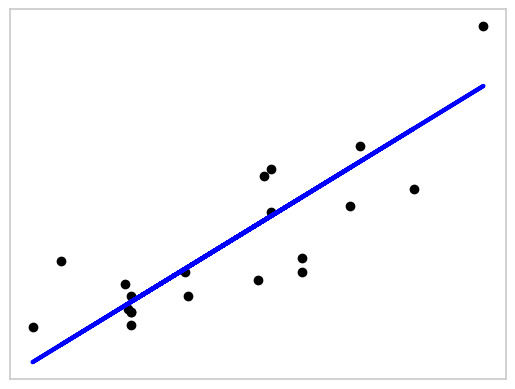

In [ ]:
# Plot
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, car_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

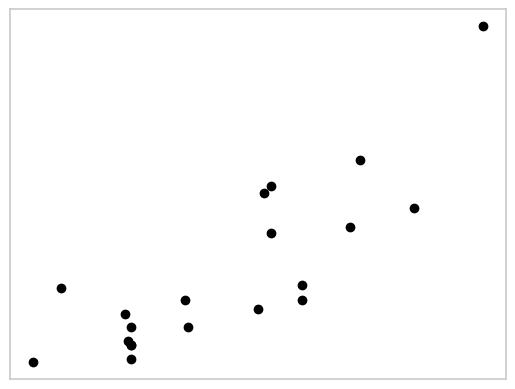

In [ ]:
plt.scatter(car_y_pred, y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

## Ejercicio para practicar

**¿Hemos seguido las suposiciones de Regresión lineal?**

1. Features y target relación lineal.
   * Comprobar con un plot que la variable elegida se relaciona de manera lineal con la variable objetivo.
2. Variables independientes no correlacionadas.
   * Mapa de calor o distribución de correlaciones entre variables independientes.
3. Distribución normal de los residuos.
    * Comprobar con un plot que la diferencia entre los valores de test de la variable y los valores de predicción siguen(se asemejan) una distribución normal.
4. Homocedasticidad.
    * Hacer un plot de residuos vs predicción.
5. Autocorrelación
    * Durbin Watson test

**¿Mejoran los resultados con una regresión lineal múltiple?**



**Ejercicio 1 Features y target relacion lineal**

**Scatter plot + línea de regresión:** Este gráfico permite visualizar si existe una tendencia lineal entre enginesize y price.

**Interpretación:** Una dispersión de puntos que sigue aproximadamente la línea roja sugiere que la relación es lineal, lo cual es fundamental para aplicar la regresión lineal.

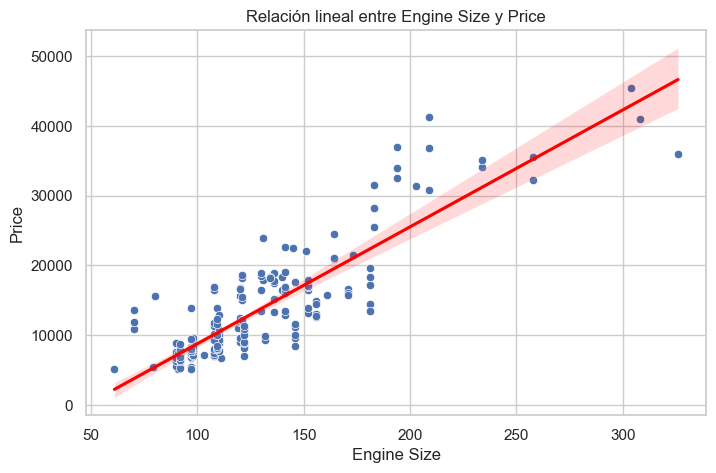

In [ ]:
## Ejercicio 1 ##

# Supongamos que la variable objetivo es 'price' y la feature es 'enginesize'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='enginesize', y='price', data=df)
sns.regplot(x='enginesize', y='price', data=df, scatter=False, color='red')
plt.title('Relación lineal entre Engine Size y Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


**Ejercicio 2**

**Variables Independientes No Correlacionadas**

**Heatmap de correlación:** La matriz muestra la correlación entre las variables seleccionadas.

**Interpretación:** Valores cercanos a 1 o -1 indican una fuerte correlación, lo que podría sugerir problemas de multicolinealidad. En ese caso, se debería considerar eliminar o combinar variables.

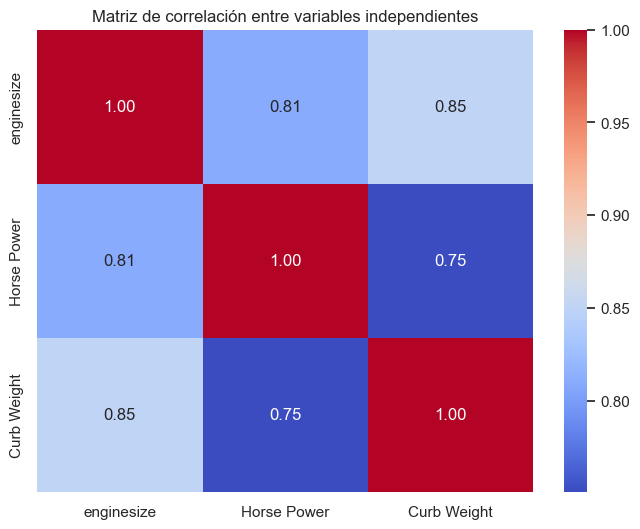

In [ ]:
## Ejercicio 2##

# Seleccionamos algunas variables independientes de interés
car_df = car_df.rename(columns={
    'horsepower': 'Horse Power',
    'curbweight': 'Curb Weight'
})

features = ['enginesize', 'Horse Power', 'Curb Weight']
corr_matrix = car_df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables independientes')
plt.show()

**Ejercicio 3**

**Histograma y KDE:** Permite ver si la distribución de los residuos se asemeja a una campana normal.

**Q-Q Plot:** Un gráfico cuantil-cuantil en el que los puntos alineados a lo largo de la línea de 45° indican una distribución normal.

**Interpretación:** Si los residuos se distribuyen de manera normal, se cumple una de las suposiciones fundamentales de la regresión lineal.

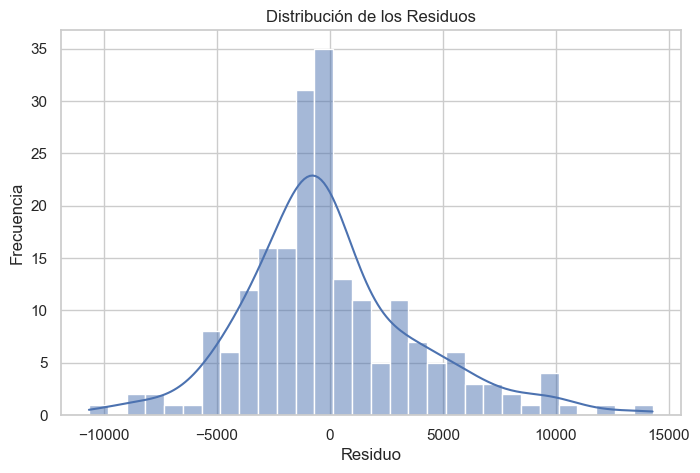

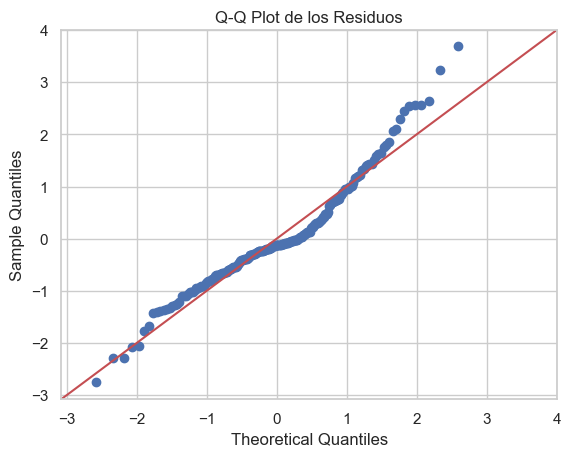

In [ ]:
#%pip install statsmodels

import statsmodels.api as sm
import scipy.stats as stats

# Construyamos un modelo simple para ejemplificar
X_simple = df[['enginesize']]
y = df['price']
X_simple = sm.add_constant(X_simple)

modelo_simple = sm.OLS(y, X_simple).fit()
predicciones_simple = modelo_simple.predict(X_simple)
residuos = y - predicciones_simple

# Histograma de residuos
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q para residuos
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q Plot de los Residuos')
plt.show()


**Ejercicio 4**

**Residuos vs Predicción:** En este gráfico se espera observar una dispersión aleatoria de residuos sin patrones claros (como embudos o curvas).

**Interpretación:** La homocedasticidad (varianza constante) es importante para que los errores estimados del modelo sean válidos. Un patrón en el gráfico indicaría heterocedasticidad y podría requerir transformación o ajuste del modelo.

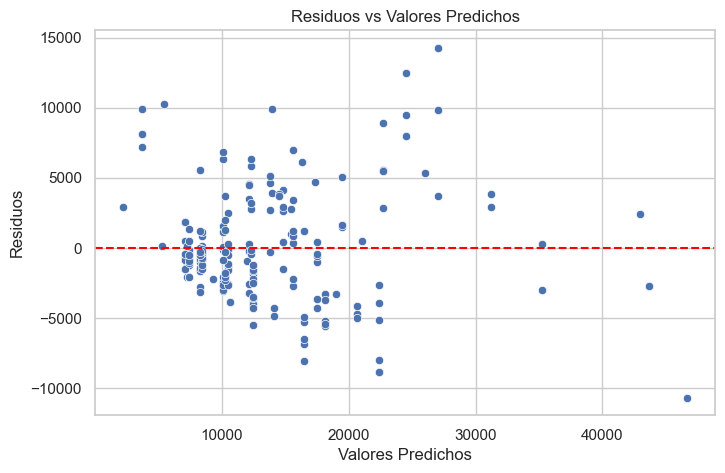

In [ ]:
# Plot de residuos vs valores predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predicciones_simple, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


**Ejercicio 5**

**Autocorrelación de los Residuos: Test de Durbin Watson**

**Durbin Watson:** Este estadístico varía entre 0 y 4, donde un valor cercano a 2 indica ausencia de autocorrelación.

**Interpretación:** Valores significativamente menores que 2 (o mayores) indican la presencia de autocorrelación, lo que podría invalidar algunas inferencias del modelo.

In [ ]:
##Ejercicio 5 ##
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuos)
print(f'Estadístico Durbin-Watson: {dw_stat:.2f}')


Estadístico Durbin-Watson: 0.77


**Ejercicio 6**

**¿Mejoran los Resultados con una Regresión Lineal Múltiple?**

**Modelo Múltiple:** Al incluir varias variables se puede capturar más información que explique la variabilidad en el precio.

**Comparación de métricas:** Se puede comparar el R-cuadrado, el error estándar y las pruebas de significancia de cada variable con el modelo simple.

**Interpretación:** Si el modelo múltiple muestra un R² mayor, menores errores y las variables son estadísticamente significativas, se concluye que el modelo se ha beneficiado al incluir más predictores.

In [ ]:
##Ejercicio 6 #

# Selección de múltiples variables predictoras
features_multi = ['enginesize', 'Horse Power', 'Curb Weight']
X_multi = car_df[features_multi]
y = car_df['price']
X_multi = sm.add_constant(X_multi)

modelo_multiple = sm.OLS(y, X_multi).fit()
print(modelo_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           4.36e-73
Time:                        15:28:16   Log-Likelihood:                -1960.2
No. Observations:                 205   AIC:                             3928.
Df Residuals:                     201   BIC:                             3942.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.346e+04   1333.051    -10.100      